In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [130]:
def read_metrics_csv(dataset, method):
    df = pd.read_csv(f"results/{dataset}/{method}_metrics.csv")
    runs = [group for _, group in df.groupby("run_id")]
    return runs


In [131]:
def read_summaries(dataset, method, stage):
    df = pd.read_csv(f"results/{dataset}/{stage}/{method}_summaries.csv")
    summaries = [group for _, group in df.groupby("run_id")]
    return summaries



In [132]:
def read_summaries(dataset, method, stage):
    if stage == "cas":
        file_path = f"results/{dataset}/{stage}/{method}_cas_summaries.csv"
    else:
        file_path = f"results/{dataset}/{stage}/{method}_summaries.csv"
    if os.path.getsize(file_path) > 0:  # Check if file is not empty
        df = pd.read_csv(file_path)
        df["method"] = method  # Add a column to indicate the method
        df["dataset"] = dataset  # Add a column to indicate the dataset
        return df
    

    else:
        print(f"File {file_path} is empty.")
        return pd.DataFrame()  # Return an empty DataFrame

# List of methods
methods = [
    "regular",
    "vibcreg_warp",
    "vibcreg_slice",
    "vibcreg_gauss",
    "barlowtwins_warp",
    "barlowtwins_slice",
    "barlowtwins_gauss",
]


datasets = [
    "ElectricDevices",
    "StarLightCurves",
    "Wafer",
    "ECG5000",
    "TwoPatterns",
    "FordA",
    "UWaveGestureLibraryAll",
    "FordB",
    "ShapesAll",
    'SonyAIBORobotSurface1', 
    'SonyAIBORobotSurface2', 
    'Symbols',
    'Mallat'
]

# Read the summaries for all methods and all datasets into a single DataFrame
all_summaries_stage1 = pd.concat([read_summaries(dataset, method, "stage1") for dataset in datasets for method in methods])
all_summaries_stage2 = pd.concat([read_summaries(dataset, method, "stage2") for dataset in datasets for method in methods])
all_summaries_cas = pd.concat([read_summaries(dataset, method, "cas") for dataset in datasets for method in methods])



In [133]:
def split_and_apply(df):
    def split_method(method):
        if method == "regular":
            return "regular", "none"
        else:
            parts = method.split('_')
            ssl_method = parts[0]
            aug = parts[1] if len(parts) > 1 else "none"
            return ssl_method, aug

    df[['SSL_method', 'Aug']] = df['method'].apply(lambda x: pd.Series(split_method(x)))
    df.drop(columns=['method'], inplace=True)
    return df





In [134]:
datasets = [
    "ElectricDevices",
    "StarLightCurves",
    "Wafer",
    "ECG5000",
    "TwoPatterns",
    "FordA",
    "UWaveGestureLibraryAll",
    "FordB",
    "ShapesAll",
    'SonyAIBORobotSurface1', 
    'SonyAIBORobotSurface2', 
    'Symbols',
    'Mallat'
]

# Summaries

In [145]:
all_summaries_stage1.reset_index()

index  svm_accuracy  knn_accuracy  perplexity  val_perplexity  \
0        0      0.430424      0.348593   14.529005        5.827195   
1        1      0.415251      0.350798   16.775717        7.281933   
2        2      0.396965      0.328103   17.464882        6.721356   
3        3      0.413695      0.354429   16.393616        6.809471   
4        0      0.355596      0.330956   18.144230        7.579749   
..     ...           ...           ...         ...             ...   
359      3      0.852026      0.737313   13.697789       13.173158   
360      0      0.795736      0.660981   11.581188       11.637478   
361      1      0.796588      0.719403   17.938433       17.581158   
362      2      0.737313      0.666525   18.411734       16.953226   
363      3      0.783369      0.662687   12.744605       12.465032   

     mean_abs_corr_off_diagonal  mean_abs_cos_sim_off_diagonal  \
0                      0.457517                       0.436557   
1                      0.387605                       0.366809   
2                      0.364648                       0.350220   
3                      0.389039                       0.374908   
4                      0.393435                       0.386061   
..                          ...                            ...   
359                    0.304453                       0.305636   
360                         NaN                       0.154832   
361                    0.290665                       0.293989   
362                    0.337928                       0.334565   
363                         NaN                       0.257923   

     val_recon_loss  training_time    run_id             method  \
0          0.040008    4519.543053  knuqn8bg            regular   
1          0.040581    4893.158468  8l5myxzk            regular   
2          0.036044    3108.412263  o8g9mfia            regular   
3          0.045513    3585.668052  uchpj3rv            regular   
4          0.095612   14457.344584  fpvkbd7x       vibcreg_warp   
..              ...            ...       ...                ...   
359        0.076473    1655.868736  p3wpr4t2  barlowtwins_slice   
360        0.093315     838.012500  g6tmo4rs  barlowtwins_gauss   
361        0.088253    1392.244020  gf7xbea8  barlowtwins_gauss   
362        0.097620    2255.298567  wclkzwwt  barlowtwins_gauss   
363        0.103512    2055.636494  vcv283nt  barlowtwins_gauss   

             dataset  
0    ElectricDevices  
1    ElectricDevices  
2    ElectricDevices  
3    ElectricDevices  
4    ElectricDevices  
..               ...  
359           Mallat  
360           Mallat  
361           Mallat  
362           Mallat  
363           Mallat  

[364 rows x 12 columns]

In [152]:
summary_stage1= all_summaries_stage1[['svm_accuracy', 'knn_accuracy', 'val_recon_loss']]
summary_stage2 = all_summaries_stage2[['FID', 'IS_mean']]
summaries_cas = all_summaries_cas[['val_acc_ema', "method", "dataset"]]
total = pd.concat([summary_stage1, summary_stage2, all_summaries_cas], axis = 1)
total = split_and_apply(total)
total

svm_accuracy  knn_accuracy  val_recon_loss        FID   IS_mean  \
0       0.430424      0.348593        0.040008  15.435189  3.488721   
1       0.415251      0.350798        0.040581  12.541792  3.974428   
2       0.396965      0.328103        0.036044  12.051533  3.770713   
3       0.413695      0.354429        0.045513  13.886247  3.779307   
0       0.355596      0.330956        0.095612  13.357634  4.233015   
..           ...           ...             ...        ...       ...   
3       0.852026      0.737313        0.076473   3.614945  2.979197   
0       0.795736      0.660981        0.093315   2.151978  3.330563   
1       0.796588      0.719403        0.088253   2.024830  3.492853   
2       0.737313      0.666525        0.097620   2.461450  3.638705   
3       0.783369      0.662687        0.103512   1.848631  3.661163   

    val_acc_ema    run_id          dataset   SSL_method    Aug  
0      0.600400  o69peirn  ElectricDevices      regular   none  
1      0.643718  meqsiphc  ElectricDevices      regular   none  
2      0.596961  5eifksor  ElectricDevices      regular   none  
3      0.613773  ygimo54o  ElectricDevices      regular   none  
0      0.607297  ci4ltxl8  ElectricDevices      vibcreg   warp  
..          ...       ...              ...          ...    ...  
3      0.579179  lt9qtec8           Mallat  barlowtwins  slice  
0      0.803742  8v3tukeu           Mallat  barlowtwins  gauss  
1      0.832666  pgzqste3           Mallat  barlowtwins  gauss  
2      0.500517  fcqley1s           Mallat  barlowtwins  gauss  
3      0.505361  lnyy52e4           Mallat  barlowtwins  gauss  

[364 rows x 10 columns]

In [93]:

summary_stage1_mean= all_summaries_stage1.groupby(['method', 'dataset'])[['svm_accuracy', 'knn_accuracy', 'val_recon_loss']].agg(
    svm_accuracy_mean=('svm_accuracy', 'mean'),
    knn_accuracy_mean=('knn_accuracy', 'mean'),
    val_recon_loss_mean=('val_recon_loss', 'mean')
    ).reset_index()
summary_stage1_mean = summary_stage1_mean.round({'svm_accuracy_mean': 2, 'knn_accuracy_mean': 2, "val_recon_loss_min":3})

summary_stage2_mean = all_summaries_stage2.groupby(['method', 'dataset'])[['FID', 'IS_mean']].agg(
    IS_mean_mean=('IS_mean', 'mean'),
    FID_mean=('FID', 'mean')
    ).reset_index()
summary_stage2_mean = summary_stage2_mean.round({'IS_mean_mean': 2, 'FID_mean': 2})

all_summaries_cas_mean = all_summaries_cas.groupby(['method', 'dataset'])[['val_acc_ema']].agg(
    val_acc_ema_mean=('val_acc_ema', 'mean')
    ).reset_index()
all_summaries_cas_mean = all_summaries_cas_mean.round({'val_acc_ema_mean': 3})
total_mean = pd.merge(summary_stage1_mean, summary_stage2_mean, how="inner")
total_mean = split_and_apply(pd.merge(total_mean, all_summaries_cas_mean, how="inner"))




In [94]:
summary_stage1_best = all_summaries_stage1.groupby(['method', 'dataset'])[['svm_accuracy', 'knn_accuracy', 'val_recon_loss']].agg(
    svm_accuracy_max=('svm_accuracy', 'max'),
    knn_accuracy_max=('knn_accuracy', 'max'),
    val_recon_loss_min=('val_recon_loss', 'min')
).reset_index()
summary_stage1_best = summary_stage1_best.round({'svm_accuracy_max': 2, 'knn_accuracy_max': 2, "val_recon_loss_min":3})

summary_stage2_best = all_summaries_stage2.groupby(['method', 'dataset']).agg(
    IS_mean_max=('IS_mean', 'max'),
    FID_min=('FID', 'min')
).reset_index()
summary_stage2_best = summary_stage2_best.round({'IS_mean_max': 2, 'FID_min': 2})

all_summaries_cas_max = all_summaries_cas.groupby(['method', 'dataset'])[['val_acc_ema']].agg(
    val_acc_ema_max=('val_acc_ema', 'max')
    ).reset_index()
all_summaries_cas_max = all_summaries_cas_max.round({'val_acc_ema_max': 3})


total_best = pd.merge(summary_stage1_best, summary_stage2_best, how="inner")
total_best = split_and_apply(pd.merge(total_best, all_summaries_cas_max, how="inner"))

In [95]:
total_mean

dataset  svm_accuracy_mean  knn_accuracy_mean  \
0                  ECG5000               0.84               0.86   
1          ElectricDevices               0.42               0.40   
2                    FordA               0.83               0.80   
3                    FordB               0.68               0.64   
4                   Mallat               0.78               0.68   
..                     ...                ...                ...   
86         StarLightCurves               0.94               0.92   
87                 Symbols               0.61               0.45   
88             TwoPatterns               0.90               0.64   
89  UWaveGestureLibraryAll               0.73               0.62   
90                   Wafer               0.94               0.97   

    val_recon_loss_mean  IS_mean_mean  FID_mean  val_acc_ema_mean  \
0              0.104447          2.00      2.47             0.880   
1              0.048868          3.75     11.54             0.599   
2              0.108488          1.45      2.28             0.878   
3              0.123186          1.52      2.88             0.741   
4              0.095675          3.53      2.12             0.661   
..                  ...           ...       ...               ...   
86             0.051968          2.35      1.07             0.962   
87             0.077689          3.20      8.84             0.969   
88             0.213724          2.56      4.05             0.715   
89             0.189319          2.91      6.80             0.360   
90             0.035231          1.26      3.67             0.979   

     SSL_method    Aug  
0   barlowtwins  gauss  
1   barlowtwins  gauss  
2   barlowtwins  gauss  
3   barlowtwins  gauss  
4   barlowtwins  gauss  
..          ...    ...  
86      vibcreg   warp  
87      vibcreg   warp  
88      vibcreg   warp  
89      vibcreg   warp  
90      vibcreg   warp  

[91 rows x 9 columns]

## Val recon loss

In [18]:
summary_val_loss_mean= all_summaries_stage1.groupby(['method', 'dataset'])[['val_recon_loss']].agg(
    val_recon_loss_mean=('val_recon_loss', 'mean')
    ).reset_index()
summary_val_loss_mean = summary_val_loss_mean.round({'val_recon_loss_mean': 3})

summary_val_loss_min= all_summaries_stage1.groupby(['method', 'dataset'])[['val_recon_loss']].agg(
    val_recon_loss_min=('val_recon_loss', 'min')
    ).reset_index()
summary_val_loss_min = summary_val_loss_min.round({'val_recon_loss_min': 3})

summary_val_loss_min = split_and_apply(summary_val_loss_min)

summary_val_loss_mean = split_and_apply(summary_val_loss_mean)

## CAS

In [19]:
all_summaries_cas_mean = all_summaries_cas.groupby(['method', 'dataset'])[['val_acc_ema']].agg(
    val_acc_ema_mean=('val_acc_ema', 'mean')
    ).reset_index()
all_summaries_cas_mean = all_summaries_cas_mean.round({'val_acc_ema_mean': 3})
all_summaries_cas_mean = split_and_apply(all_summaries_cas_mean) 

all_summaries_cas_max = all_summaries_cas.groupby(['method', 'dataset'])[['val_acc_ema']].agg(
    val_acc_ema_max=('val_acc_ema', 'max')
    ).reset_index()
all_summaries_cas_max = all_summaries_cas_max.round({'val_acc_ema_max': 3})

all_summaries_cas_max = split_and_apply(all_summaries_cas_max) 

all_summaries_cas = split_and_apply(all_summaries_cas) 


In [20]:
all_summaries_cas

val_acc_ema    run_id          dataset   SSL_method    Aug
0      0.600400  o69peirn  ElectricDevices      regular   none
1      0.643718  meqsiphc  ElectricDevices      regular   none
2      0.596961  5eifksor  ElectricDevices      regular   none
3      0.613773  ygimo54o  ElectricDevices      regular   none
0      0.607297  ci4ltxl8  ElectricDevices      vibcreg   warp
..          ...       ...              ...          ...    ...
3      0.579179  lt9qtec8           Mallat  barlowtwins  slice
0      0.803742  8v3tukeu           Mallat  barlowtwins  gauss
1      0.832666  pgzqste3           Mallat  barlowtwins  gauss
2      0.500517  fcqley1s           Mallat  barlowtwins  gauss
3      0.505361  lnyy52e4           Mallat  barlowtwins  gauss

[364 rows x 5 columns]

## Stage 1 and 2

In [21]:

summary_df_stage1_mean= all_summaries_stage1.groupby(['method', 'dataset'])[['svm_accuracy', 'knn_accuracy']].agg(
    svm_accuracy_mean=('svm_accuracy', 'mean'),
    knn_accuracy_mean=('knn_accuracy', 'mean')
    ).reset_index()
summary_df_stage1_mean = summary_df_stage1_mean.round({'svm_accuracy_mean': 2, 'knn_accuracy_mean': 2})


summary_df_stage2_mean = all_summaries_stage2.groupby(['method', 'dataset'])[['FID', 'IS_mean']].agg(
    IS_mean_mean=('IS_mean', 'mean'),
    FID_mean=('FID', 'mean')
    ).reset_index()
summary_df_stage2_mean = summary_df_stage2_mean.round({'IS_mean_mean': 2, 'FID_mean': 2})


summary_df_stage1_best = all_summaries_stage1.groupby(['method', 'dataset'])[['svm_accuracy', 'knn_accuracy']].agg(
    svm_accuracy_max=('svm_accuracy', 'max'),
    knn_accuracy_max=('knn_accuracy', 'max')
).reset_index()
summary_df_stage1_best = summary_df_stage1_best.round({'svm_accuracy_max': 2, 'knn_accuracy_max': 2})

summary_df_stage2_best = all_summaries_stage2.groupby(['method', 'dataset']).agg(
    IS_mean_max=('IS_mean', 'max'),
    FID_min=('FID', 'min')
).reset_index()
summary_df_stage2_best = summary_df_stage2_best.round({'IS_mean_max': 2, 'FID_min': 2})


summary_stage1 = split_and_apply(pd.merge(summary_df_stage1_mean, summary_df_stage1_best, how="inner"))
summary_stage2 = split_and_apply(pd.merge(summary_df_stage2_mean, summary_df_stage2_best, how="inner"))

summary_mean = pd.merge(summary_df_stage1_mean, summary_df_stage2_mean, how="inner")
summary_max = pd.merge(summary_df_stage1_best, summary_df_stage2_best, how="inner")



summary_df_stage2_mean = split_and_apply(summary_df_stage2_mean)


# Plots

## Probe accuracies

In [22]:
def plot_accuracy(ax, df, ssl_method, accuracy="svm_accuracy_max", aug_method=None, color=None, marker='o', linestyle="-", label=""):
    # Filter the dataframe based on the SSL method and the augmentation method
    if aug_method:
        df_filtered = df[(df['SSL_method'] == ssl_method) & (df['Aug'] == aug_method)]
    else:
        df_filtered = df[df['SSL_method'] == ssl_method]

    # Sort the dataframe by dataset
    df_filtered = df_filtered.sort_values('dataset')

    # Plot the max SVM accuracy with a line style and color
    ax.plot(df_filtered['dataset'], df_filtered[accuracy] * 100, label=label, linestyle=linestyle, marker=marker, color=color)
    ax.tick_params(axis='x', labelsize=11)  # Change the size of the x-axis labels

    return ax



sns.set_style("darkgrid")

# Set the color palette of seaborn
sns.set_palette("Set2")



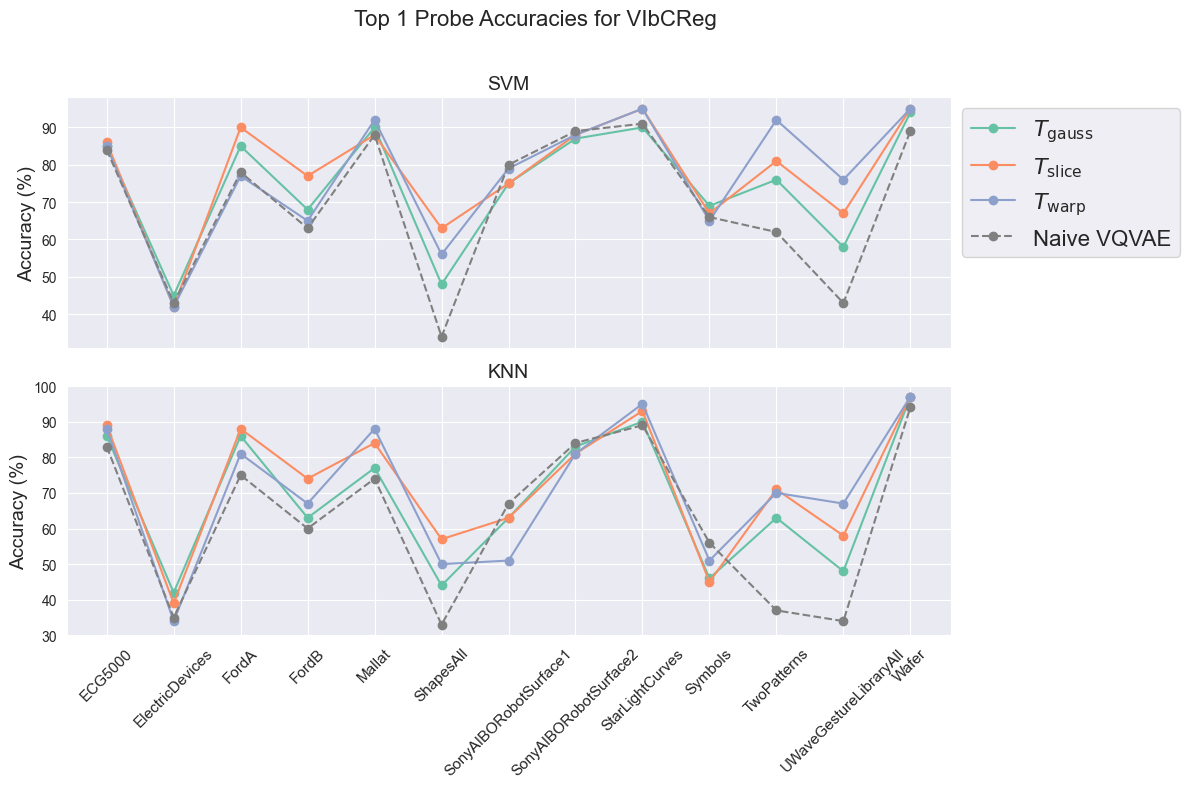

In [33]:

# Create a new figure with two subplots that share the x-axis

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Top 1 Probe Accuracies for VIbCReg", fontsize=16, x=0.45)
# Plot the max SVM accuracy
ax1.set_title('SVM', fontsize=14)
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))

# Plot the max KNN accuracy
ax2.set_title('KNN', fontsize=14)
ax2.set_ylabel('Accuracy (%)', fontsize=14)
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()


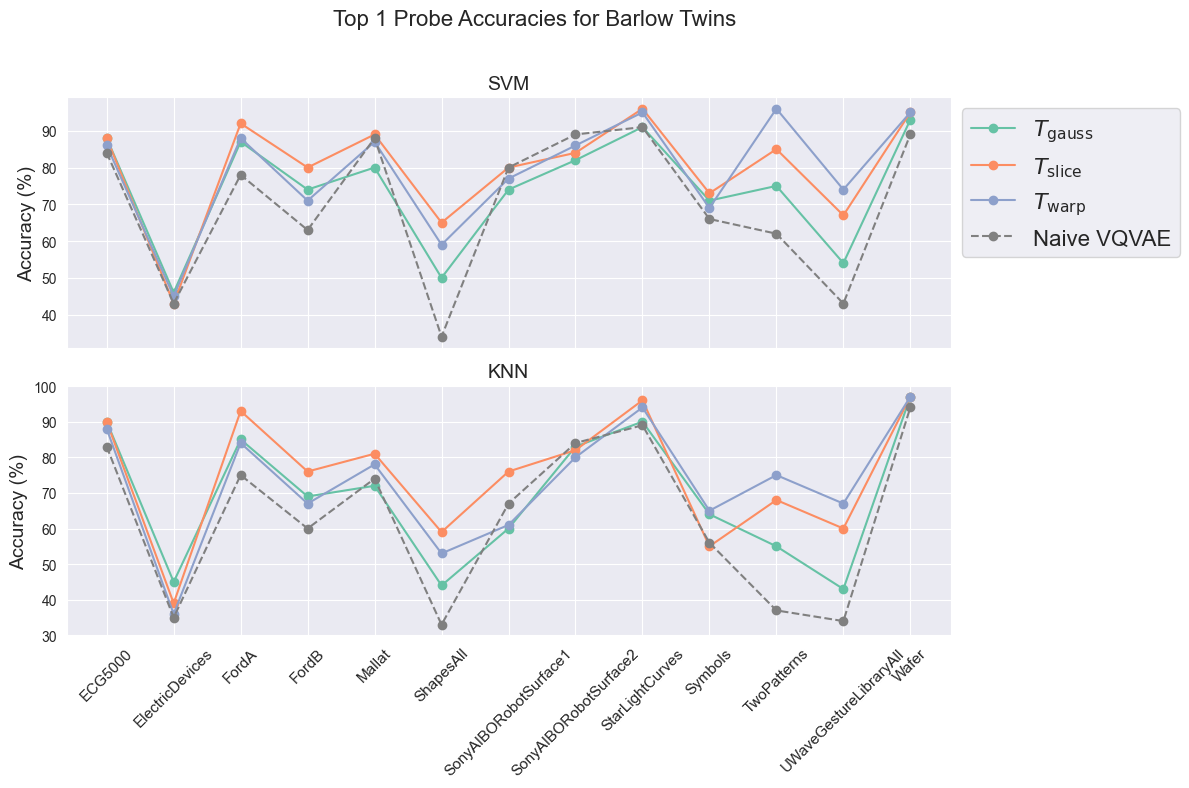

In [34]:


# Set the color palette of seaborn
# sns.set_palette("bright")

# Create a new figure
#f, a = plt.subplots(figsize=(12, 4))


# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Top 1 Probe Accuracies for Barlow Twins", fontsize=16, x=0.45)
# Plot the max SVM accuracy
ax1.set_title('SVM', fontsize=14)
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_accuracy(ax1, summary_stage1, ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1))

# Plot the max KNN accuracy
ax2.set_title('KNN', fontsize=14)
ax2.set_ylabel('Accuracy (%)', fontsize=14)
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_accuracy(ax2, summary_stage1, accuracy="knn_accuracy_max", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

## CAS

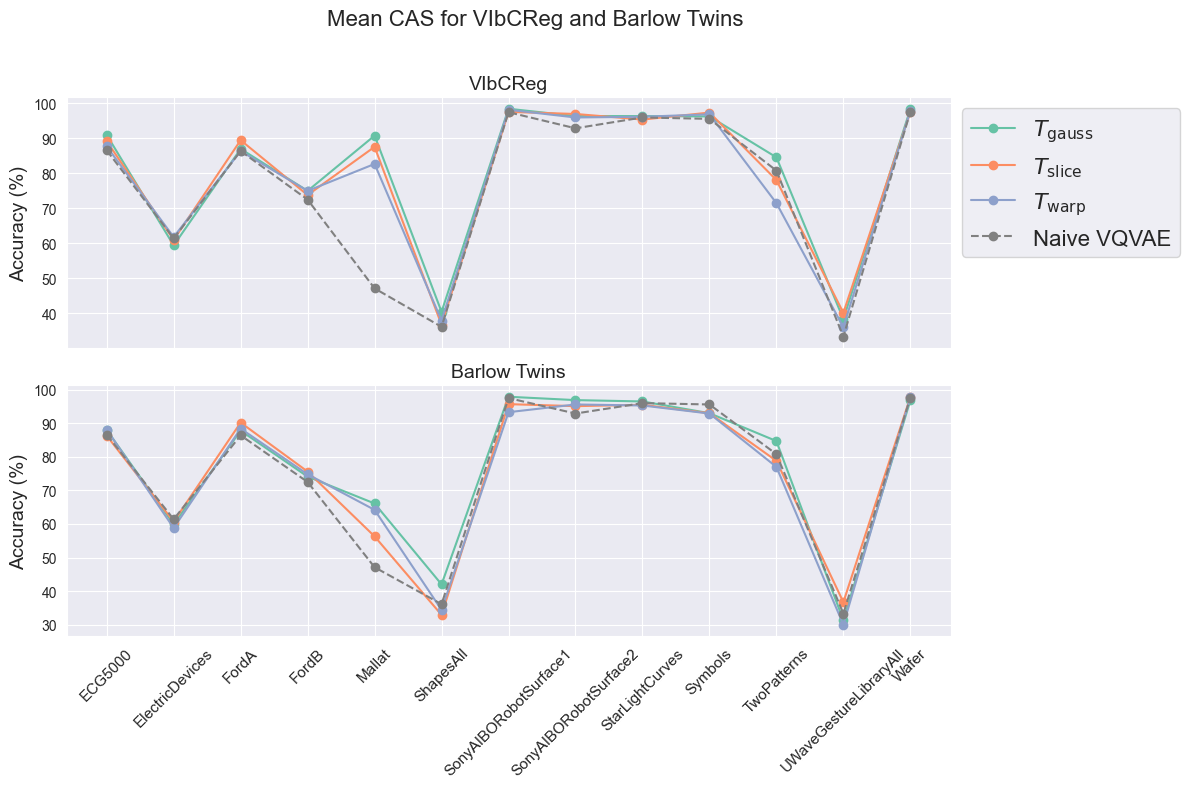

In [32]:
# all_summaries_cas_max

# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Mean CAS for VIbCReg and Barlow Twins", fontsize=16, x=0.45)
# Plot the max SVM accuracy
ax1.set_title('VIbCReg', fontsize=14)
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1 = plot_accuracy(ax1, all_summaries_cas_mean, accuracy = "val_acc_ema_mean", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_accuracy(ax1, all_summaries_cas_mean, accuracy = "val_acc_ema_mean", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_accuracy(ax1, all_summaries_cas_mean, accuracy = "val_acc_ema_mean", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_accuracy(ax1, all_summaries_cas_mean, accuracy = "val_acc_ema_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))


ax2.set_title('Barlow Twins', fontsize=14)
ax2.set_ylabel('Accuracy (%)', fontsize=14)
ax2 = plot_accuracy(ax2, all_summaries_cas_mean, accuracy="val_acc_ema_mean", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_accuracy(ax2, all_summaries_cas_mean, accuracy="val_acc_ema_mean", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_accuracy(ax2, all_summaries_cas_mean, accuracy="val_acc_ema_mean", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_accuracy(ax2, all_summaries_cas_mean, accuracy="val_acc_ema_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

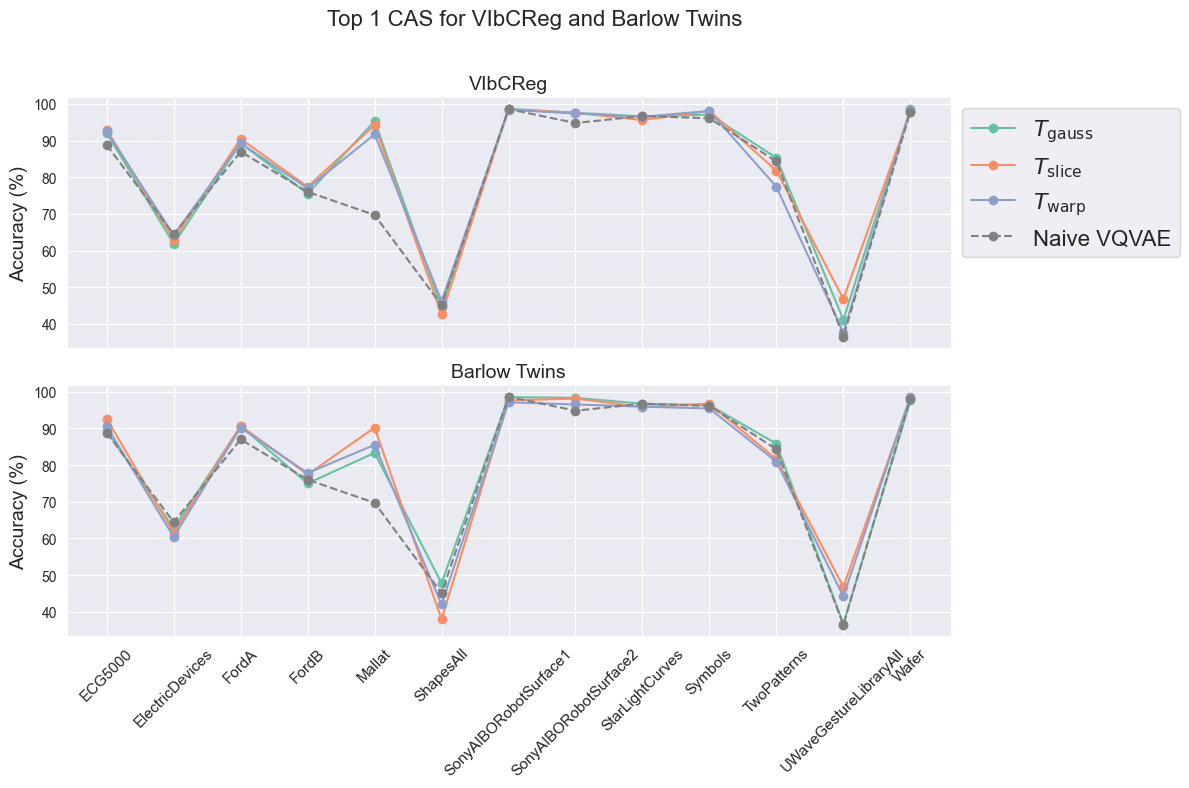

In [30]:
# all_summaries_cas_max

# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Top 1 CAS for VIbCReg and Barlow Twins", fontsize=16, x=0.45)
# Plot the max SVM accuracy
ax1.set_title('VIbCReg', fontsize=14)
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1 = plot_accuracy(ax1, all_summaries_cas_max, accuracy = "val_acc_ema_max", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_accuracy(ax1, all_summaries_cas_max, accuracy = "val_acc_ema_max", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_accuracy(ax1, all_summaries_cas_max, accuracy = "val_acc_ema_max", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_accuracy(ax1, all_summaries_cas_max, accuracy = "val_acc_ema_max", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))


ax2.set_title('Barlow Twins', fontsize=14)
ax2.set_ylabel('Accuracy (%)', fontsize=14)
ax2 = plot_accuracy(ax2, all_summaries_cas_max, accuracy="val_acc_ema_max", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_accuracy(ax2, all_summaries_cas_max, accuracy="val_acc_ema_max", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_accuracy(ax2, all_summaries_cas_max, accuracy="val_acc_ema_max", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_accuracy(ax2, all_summaries_cas_max, accuracy="val_acc_ema_max", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

## FID and IS

In [36]:
def plot_FID_IS(ax, df, ssl_method, metric = "FID_min", aug_method=None, color=None, linestyle="-", label=""):
    # Filter the dataframe based on the SSL method and the augmentation method
    if aug_method:
        df_filtered = df[(df['SSL_method'] == ssl_method) & (df['Aug'] == aug_method)]
    else:
        df_filtered = df[df['SSL_method'] == ssl_method]

    # Sort the dataframe by dataset
    df_filtered = df_filtered.sort_values('dataset')

    
    # Plot the max SVM accuracy with a line style and color
    
    ax.plot(df_filtered['dataset'], df_filtered[metric], label=label, linestyle=linestyle, marker='o', color=color)
    ax.tick_params(axis='x', labelsize=11)  # Change the size of the x-axis labels

    return ax

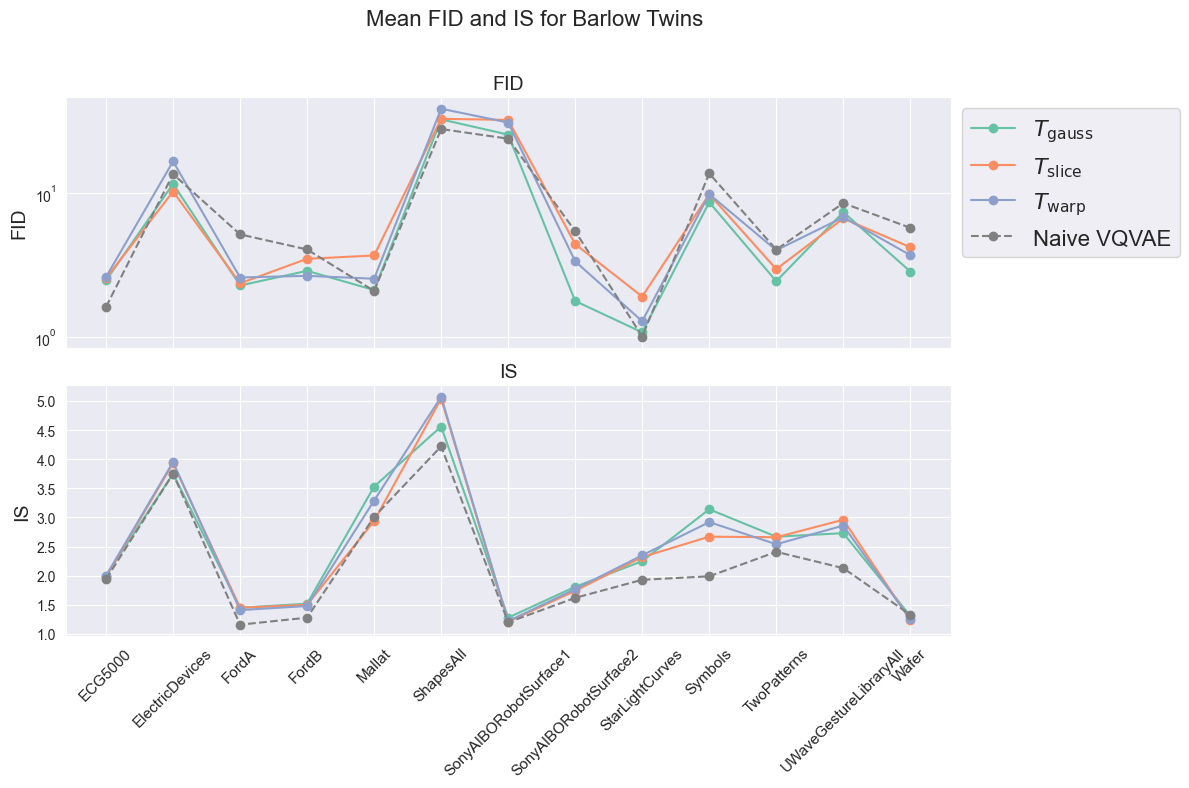

In [44]:

# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Mean FID and IS for Barlow Twins", fontsize=16, x=0.45)
# Plot the max FID score
ax1.set_title('FID', fontsize=14)
ax1.set_ylabel('FID', fontsize=14)
ax1.set_yscale('log')
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))

# Plot the max IS score
ax2.set_title('IS', fontsize=14)
ax2.set_ylabel('IS', fontsize=14)

ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

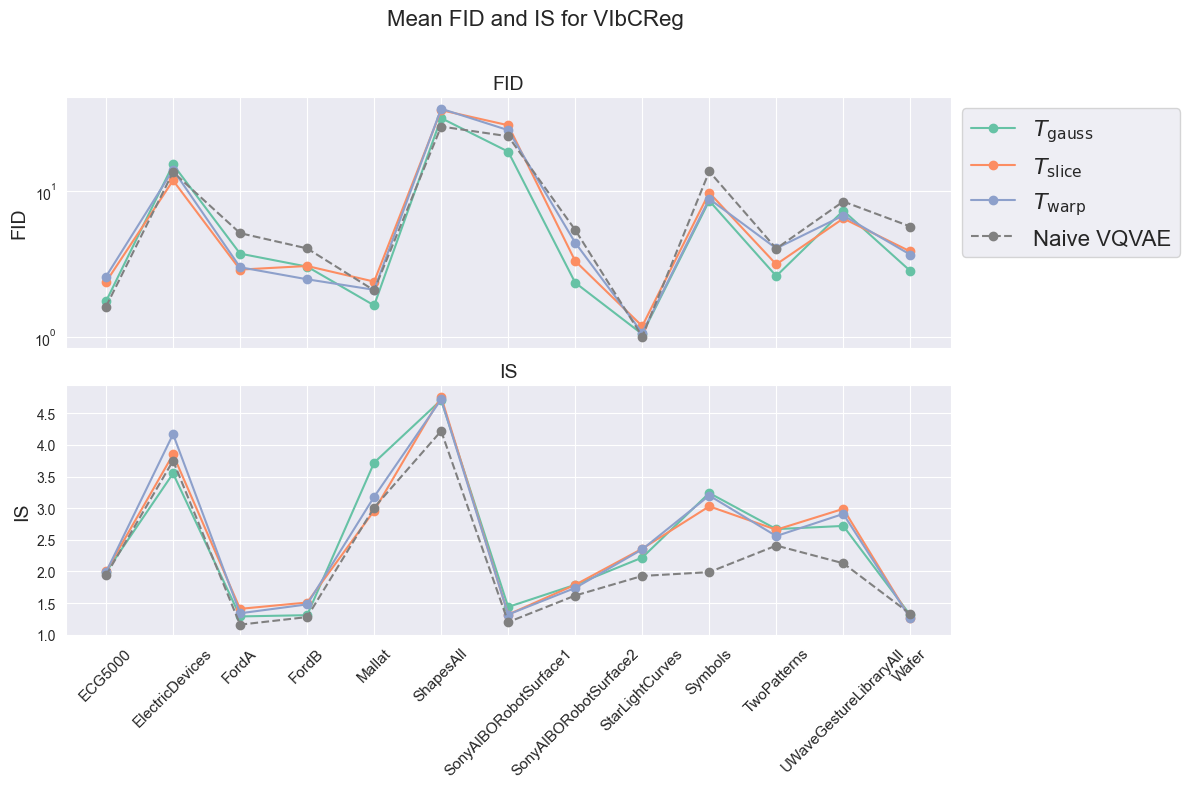

In [45]:
# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Mean FID and IS for VIbCReg", fontsize=16, x=0.45)
# Plot the max FID score
ax1.set_title('FID', fontsize=14)
ax1.set_ylabel('FID', fontsize=14)
ax1.set_yscale('log')
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))

# Plot the max IS score
ax2.set_title('IS', fontsize=14)
ax2.set_ylabel('IS', fontsize=14)

ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

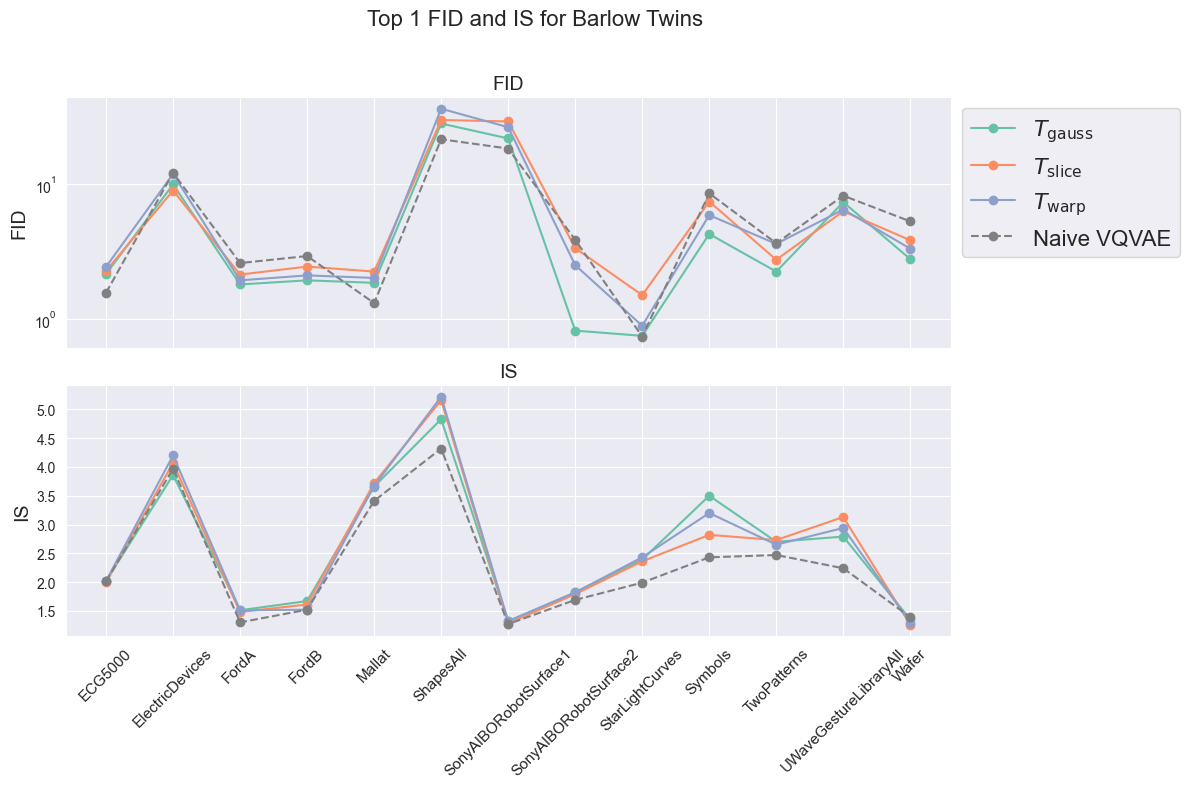

In [43]:


# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Top 1 FID and IS for Barlow Twins", fontsize=16, x=0.45)
# Plot the max FID score
ax1.set_title('FID', fontsize=14)
ax1.set_ylabel('FID', fontsize=14)
ax1.set_yscale('log')
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))

# Plot the max IS score
ax2.set_title('IS', fontsize=14)
ax2.set_ylabel('IS', fontsize=14)

ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_max", ssl_method='barlowtwins', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_max", ssl_method='barlowtwins', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_max", ssl_method='barlowtwins', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_max", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

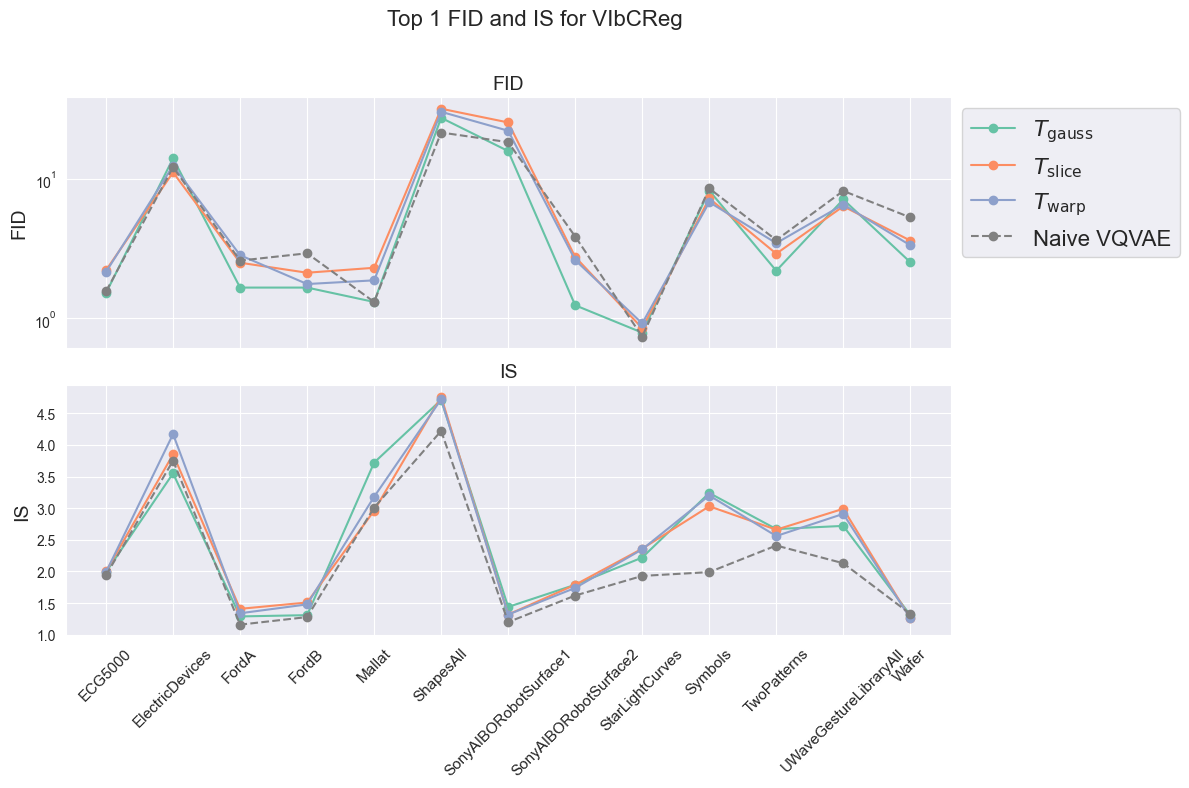

In [42]:


# Create a new figure with two subplots that share the x-axis
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
f.suptitle("Top 1 FID and IS for VIbCReg", fontsize=16, x=0.45)
# Plot the max FID score
ax1.set_title('FID', fontsize=14)
ax1.set_ylabel('FID', fontsize=14)
ax1.set_yscale('log')
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax1 = plot_FID_IS(ax1, summary_stage2,metric = "FID_min", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
ax1.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))

# Plot the max IS score
ax2.set_title('IS', fontsize=14)
ax2.set_ylabel('IS', fontsize=14)

ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='vibcreg', aug_method='gauss', label=r"$T_{\text{gauss}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='vibcreg', aug_method='slice', label=r"$T_{\text{slice}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='vibcreg', aug_method='warp', label=r"$T_{\text{warp}}$")
ax2 = plot_FID_IS(ax2, summary_stage2, metric="IS_mean_mean", ssl_method='regular', color='grey', linestyle="--", label="Naive VQVAE")
#ax2.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
#plt.savefig("probes_barlow_twins.pdf")
plt.show()

## SSL method comparrison across augs

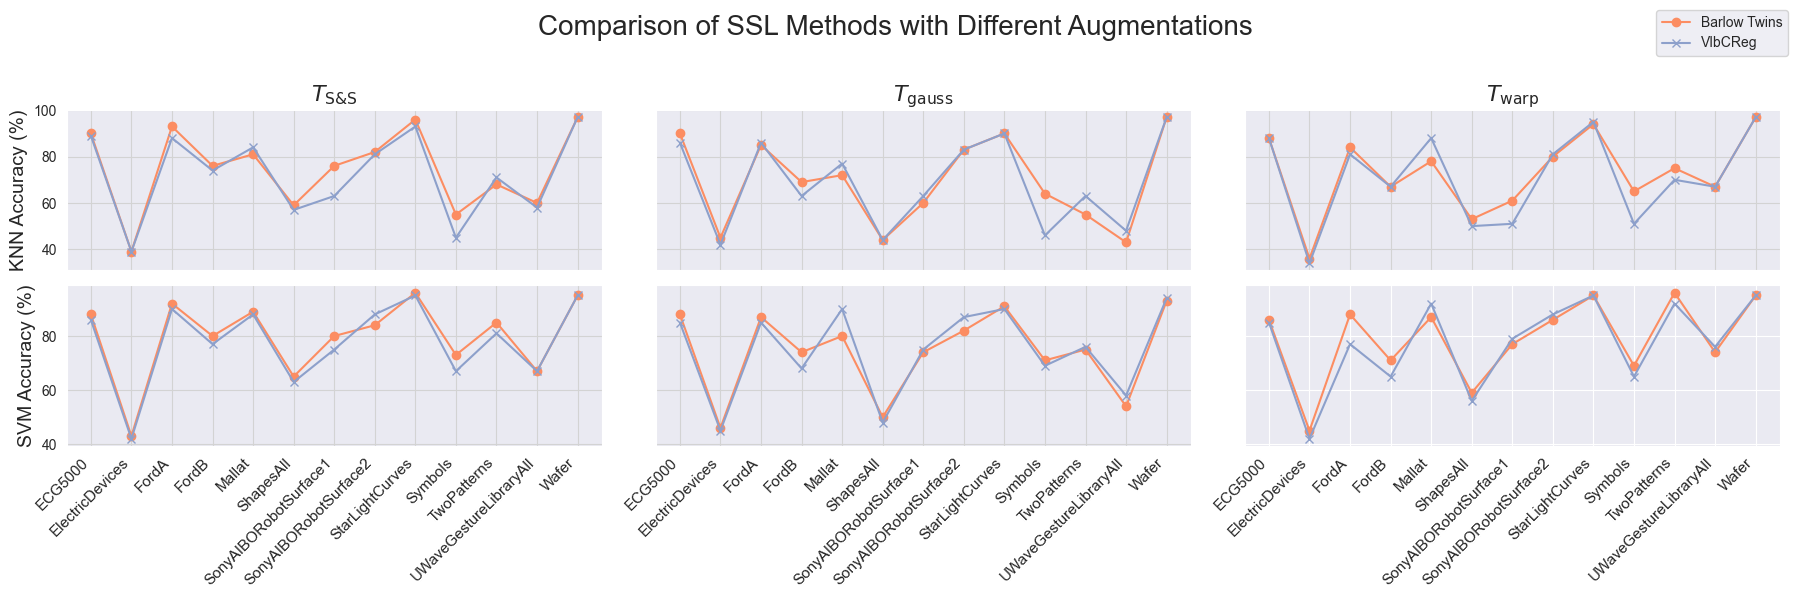

In [145]:
# Create a 2x3 grid of subplots, sharing x-axis on rows
f, a = plt.subplots(2, 3, figsize=(18, 6), sharex='col', sharey='row')

# Define colors for Barlow Twins and VIbCReg
color_bt = sns.color_palette()[1]  # A pleasing color from the palette
color_vib = sns.color_palette()[2]  # Another pleasing color from the palette

acc1 = "knn_accuracy_max"
acc2 = "svm_accuracy_max"

# Plot for slice augmentation
a[0, 0] = plot_accuracy(a[0, 0], summary_stage1, accuracy=acc1, ssl_method='barlowtwins', aug_method = "slice", label="Barlow Twins", linestyle="-", marker='o', color=color_bt)
a[0, 0] = plot_accuracy(a[0, 0], summary_stage1, accuracy=acc1, ssl_method='vibcreg', aug_method = "slice", label="VIbCReg", linestyle="-", marker='x', color=color_vib)
a[0, 0].set_title(r"$T_{\text{S\&S}}$", fontsize=16)
a[0, 0].grid(True, color='lightgrey')  # Set grid color to a softer color

a[0, 0].set_ylabel('KNN Accuracy (%)', fontsize=14)


# Plot for gauss augmentation
a[0, 1] = plot_accuracy(a[0, 1], summary_stage1, accuracy=acc1, ssl_method='barlowtwins', aug_method = "gauss", linestyle="-", marker='o', color=color_bt)
a[0, 1] = plot_accuracy(a[0, 1], summary_stage1, accuracy=acc1, ssl_method='vibcreg', aug_method = "gauss",  linestyle="-", marker='x', color=color_vib)
a[0, 1].set_title(r"$T_{\text{gauss}}$", fontsize=16)
a[0, 1].grid(True, color='lightgrey')  # Set grid color to a softer color

# Plot for warp augmentation
a[0, 2] = plot_accuracy(a[0, 2], summary_stage1, accuracy=acc1, ssl_method='barlowtwins', aug_method = "warp", linestyle="-", marker='o', color=color_bt)
a[0, 2] = plot_accuracy(a[0, 2], summary_stage1, accuracy=acc1, ssl_method='vibcreg', aug_method = "warp", linestyle="-", marker='x', color=color_vib)
a[0, 2].set_title(r"$T_{\text{warp}}$", fontsize=16)
a[0, 2].grid(True, color='lightgrey')  # Set grid color to a softer color

# Plot for KNN
# Assuming you have a function called plot_knn similar to plot_accuracy
a[1, 0] = plot_accuracy(a[1, 0], summary_stage1, accuracy=acc2, ssl_method='barlowtwins', aug_method = "slice", linestyle="-", marker='o', color=color_bt)
a[1, 0] = plot_accuracy(a[1, 0], summary_stage1, accuracy=acc2, ssl_method='vibcreg', aug_method = "slice", linestyle="-", marker='x', color=color_vib)
a[1, 0].grid(True, color='lightgrey')  # Set grid color to a softer color

a[1, 0].set_ylabel('SVM Accuracy (%)', fontsize=14)

# Plot for SXM
# Assuming you have a function called plot_sxm similar to plot_accuracy
a[1, 1] = plot_accuracy(a[1, 1], summary_stage1, accuracy=acc2,  ssl_method='barlowtwins', aug_method = "gauss", linestyle="-", marker='o', color=color_bt)
a[1, 1] = plot_accuracy(a[1, 1], summary_stage1, accuracy=acc2, ssl_method='vibcreg', aug_method = "gauss", linestyle="-", marker='x', color=color_vib)
a[1, 1].grid(True, color='lightgrey')  # Set grid color to a softer color

a[1, 2] = plot_accuracy(a[1, 2], summary_stage1, accuracy=acc2, ssl_method='barlowtwins', aug_method = "warp", linestyle="-", marker='o', color=color_bt)
a[1, 2] = plot_accuracy(a[1, 2], summary_stage1, accuracy=acc2, ssl_method='vibcreg', aug_method = "warp", linestyle="-", marker='x', color=color_vib)

# Set a title for the entire plot
f.suptitle('Comparison of SSL Methods with Different Augmentations', fontsize=20)

# Add a legend
f.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

# Rotate x-ticks by 45 degrees
for ax in a.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
plt.savefig("ssl_comparison.pdf")
plt.show()

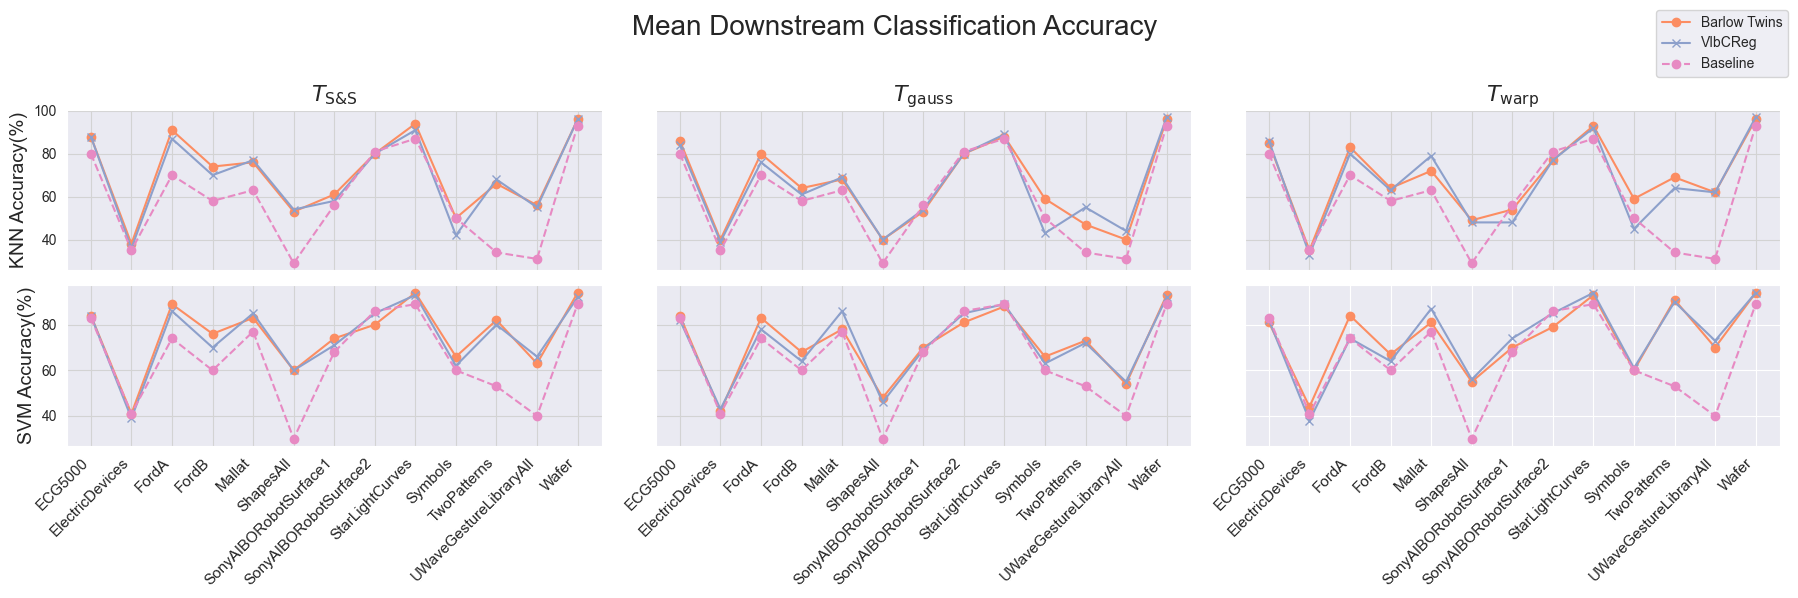

In [112]:
# Create a 2x3 grid of subplots, sharing x-axis on rows
f, a = plt.subplots(2, 3, figsize=(18, 6), sharex='col', sharey='row')

# Define colors for Barlow Twins and VIbCReg
color_bt = sns.color_palette()[1]  # A pleasing color from the palette
color_vib = sns.color_palette()[2]  # Another pleasing color from the palette
color_reg = sns.color_palette()[3]  # Another pleasing color from the palette

acc1 = "knn_accuracy_mean"
acc2 = "svm_accuracy_mean"

# Plot for slice augmentation
a[0, 0] = plot_accuracy(a[0, 0], summary_stage1, accuracy=acc1, ssl_method='barlowtwins', aug_method = "slice", label="Barlow Twins", linestyle="-", marker='o', color=color_bt)
a[0, 0] = plot_accuracy(a[0, 0], summary_stage1, accuracy=acc1,ssl_method='vibcreg', aug_method = "slice", label="VIbCReg", linestyle="-", marker='x', color=color_vib)
a[0, 0] = plot_accuracy(a[0, 0], summary_stage1, accuracy=acc1, ssl_method='regular', color=color_reg, linestyle="--", label="Baseline")

a[0, 0].set_title(r"$T_{\text{S\&S}}$", fontsize=16)
a[0, 0].grid(True, color='lightgrey')  # Set grid color to a softer color

a[0, 0].set_ylabel('KNN Accuracy(%)', fontsize=14)


# Plot for gauss augmentation
a[0, 1] = plot_accuracy(a[0, 1], summary_stage1, accuracy=acc1, ssl_method='barlowtwins', aug_method = "gauss", linestyle="-", marker='o', color=color_bt)
a[0, 1] = plot_accuracy(a[0, 1], summary_stage1, accuracy=acc1, ssl_method='vibcreg', aug_method = "gauss",  linestyle="-", marker='x', color=color_vib)
a[0, 1] = plot_accuracy(a[0, 1], summary_stage1, accuracy=acc1, ssl_method='regular', color=color_reg, linestyle="--")
a[0, 1].set_title(r"$T_{\text{gauss}}$", fontsize=16)
a[0, 1].grid(True, color='lightgrey')  # Set grid color to a softer color

# Plot for warp augmentation
a[0, 2] = plot_accuracy(a[0, 2], summary_stage1, accuracy=acc1, ssl_method='barlowtwins', aug_method = "warp", linestyle="-", marker='o', color=color_bt)
a[0, 2] = plot_accuracy(a[0, 2], summary_stage1, accuracy=acc1, ssl_method='vibcreg', aug_method = "warp", linestyle="-", marker='x', color=color_vib)
a[0, 2] = plot_accuracy(a[0, 2], summary_stage1, accuracy=acc1, ssl_method='regular', color=color_reg, linestyle="--")
a[0, 2].set_title(r"$T_{\text{warp}}$", fontsize=16)
a[0, 2].grid(True, color='lightgrey')  # Set grid color to a softer color

# Plot for KNN
# Assuming you have a function called plot_knn similar to plot_accuracy
a[1, 0] = plot_accuracy(a[1, 0], summary_stage1, accuracy=acc2, ssl_method='barlowtwins', aug_method = "slice", linestyle="-", marker='o', color=color_bt)
a[1, 0] = plot_accuracy(a[1, 0], summary_stage1, accuracy=acc2, ssl_method='vibcreg', aug_method = "slice", linestyle="-", marker='x', color=color_vib)
a[1, 0] = plot_accuracy(a[1, 0], summary_stage1, accuracy=acc2, ssl_method='regular', color=color_reg, linestyle="--")
a[1, 0].grid(True, color='lightgrey')  # Set grid color to a softer color

a[1, 0].set_ylabel('SVM Accuracy(%)', fontsize=14)

# Plot for SXM
# Assuming you have a function called plot_sxm similar to plot_accuracy
a[1, 1] = plot_accuracy(a[1, 1], summary_stage1, accuracy=acc2,  ssl_method='barlowtwins', aug_method = "gauss", linestyle="-", marker='o', color=color_bt)
a[1, 1] = plot_accuracy(a[1, 1], summary_stage1, accuracy=acc2, ssl_method='vibcreg', aug_method = "gauss", linestyle="-", marker='x', color=color_vib)
a[1, 1] = plot_accuracy(a[1, 1], summary_stage1, accuracy=acc2, ssl_method='regular', color=color_reg, linestyle="--")
a[1, 1].grid(True, color='lightgrey')  # Set grid color to a softer color

a[1, 2] = plot_accuracy(a[1, 2], summary_stage1, accuracy=acc2, ssl_method='barlowtwins', aug_method = "warp", linestyle="-", marker='o', color=color_bt)
a[1, 2] = plot_accuracy(a[1, 2], summary_stage1, accuracy=acc2, ssl_method='vibcreg', aug_method = "warp", linestyle="-", marker='x', color=color_vib)
a[1, 2] = plot_accuracy(a[1, 2], summary_stage1, accuracy=acc2, ssl_method='regular', color=color_reg, linestyle="--")
# Set a title for the entire plot
f.suptitle('Mean Downstream Classification Accuracy', fontsize=20)

# Add a legend
f.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

# Rotate x-ticks by 45 degrees
for ax in a.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle
plt.savefig("model_comp.pdf")
plt.show()

# Scatterplots

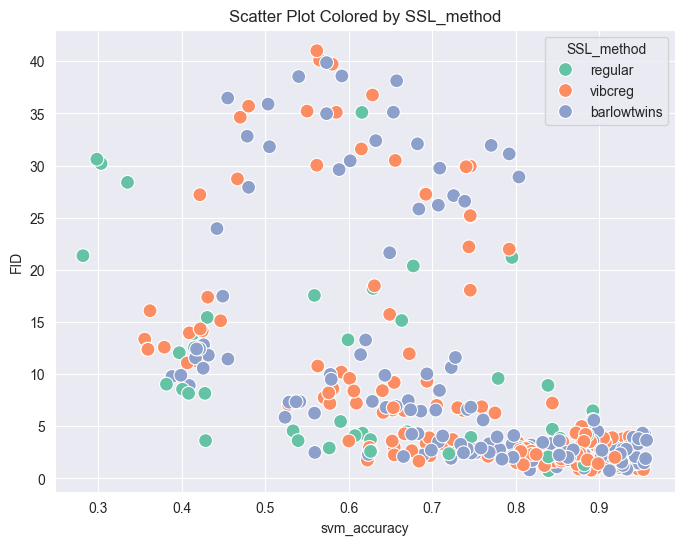

In [189]:
# scatter_df = total[["svm_accuracy", "FID", "SSL_method"]]
scatter_df = total



plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=scatter_df, x='svm_accuracy', y='FID', hue='SSL_method', palette='Set2', s=100)

plt.xlabel('svm_accuracy')
plt.ylabel('FID')
plt.title('Scatter Plot Colored by SSL_method')

plt.show()

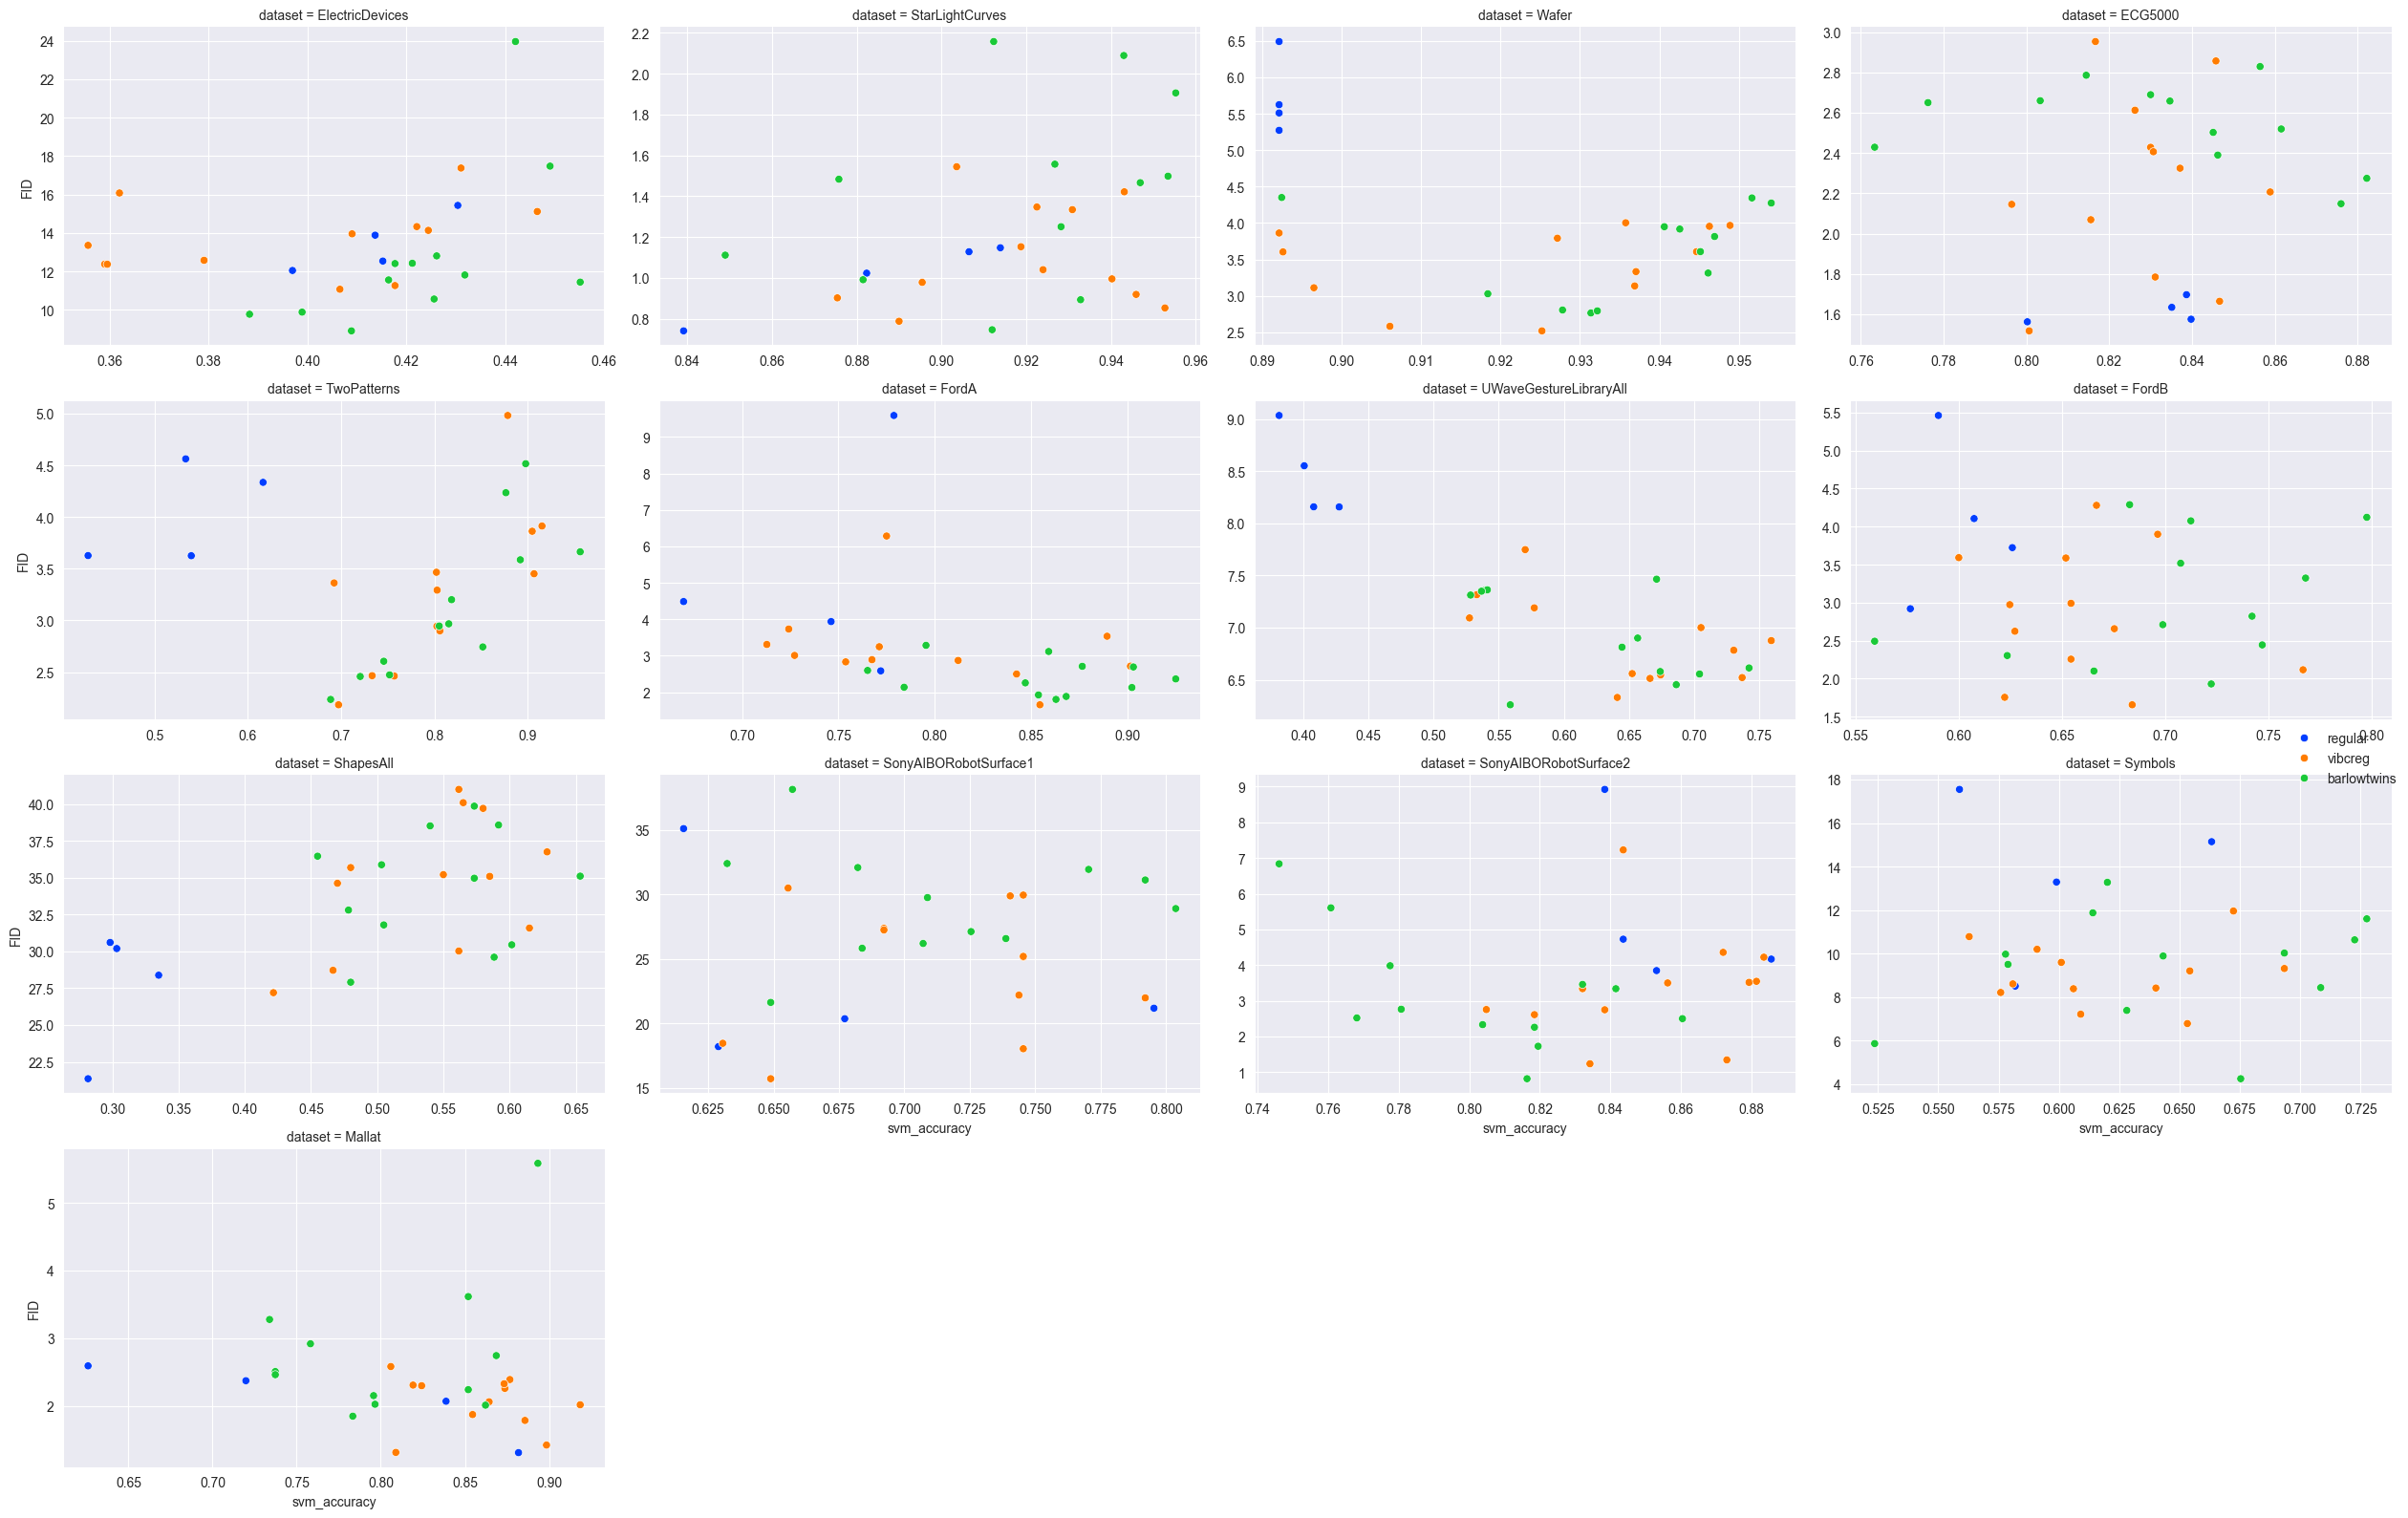

In [188]:
scatter_df = total
# Create a FacetGrid for the subplots
g = sns.FacetGrid(scatter_df, col="dataset", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the scatter plot to each subplot
g.map(sns.scatterplot, "svm_accuracy", "FID", "SSL_method", palette="bright")

# Add legends to each subplot
g.add_legend()

# Adjust the layout for better visualization
g.fig.tight_layout()

# Display the plot
plt.show()

## FID VS SVM acorss datasets, colored by augmentations

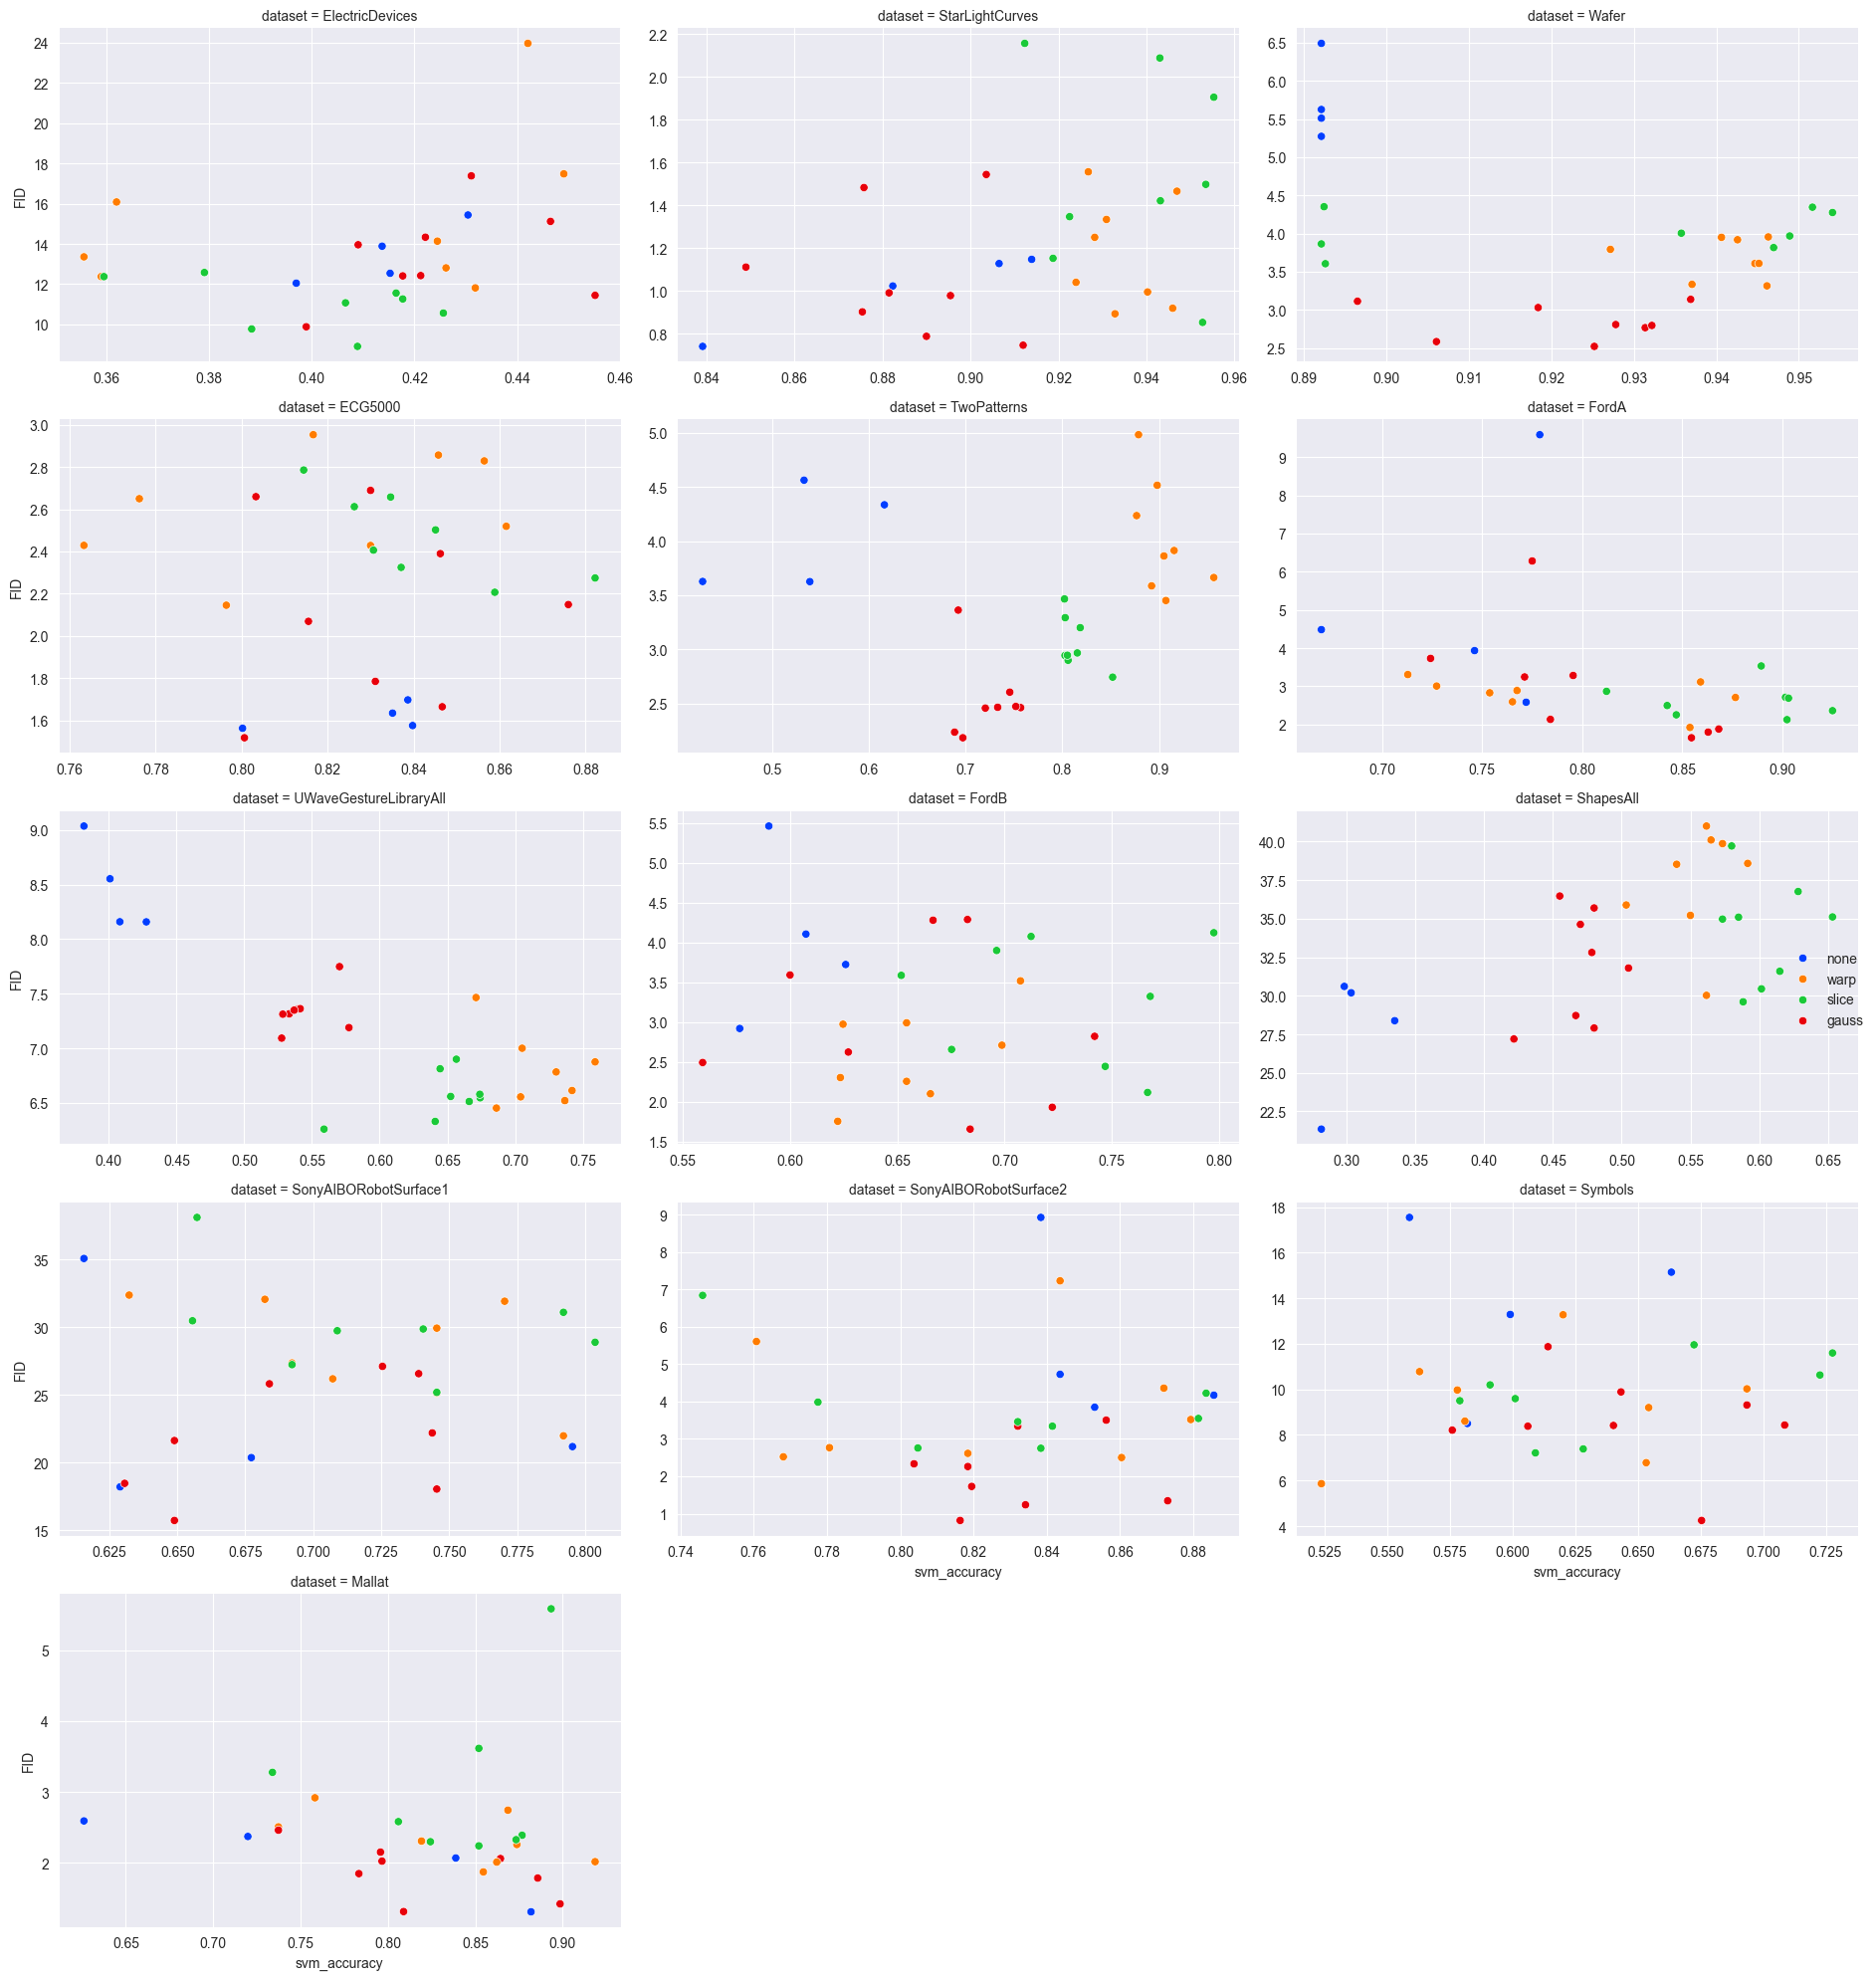

In [192]:
scatter_df = total
# Create a FacetGrid for the subplots
g = sns.FacetGrid(scatter_df, col="dataset", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the scatter plot to each subplot
g.map(sns.scatterplot, "svm_accuracy", "FID", "Aug", palette="bright")

# Add legends to each subplot
g.add_legend()

# Adjust the layout for better visualization
g.fig.tight_layout()

# Display the plot
plt.show()

## Val Recons VS SVM across datasets, colored by augmentations

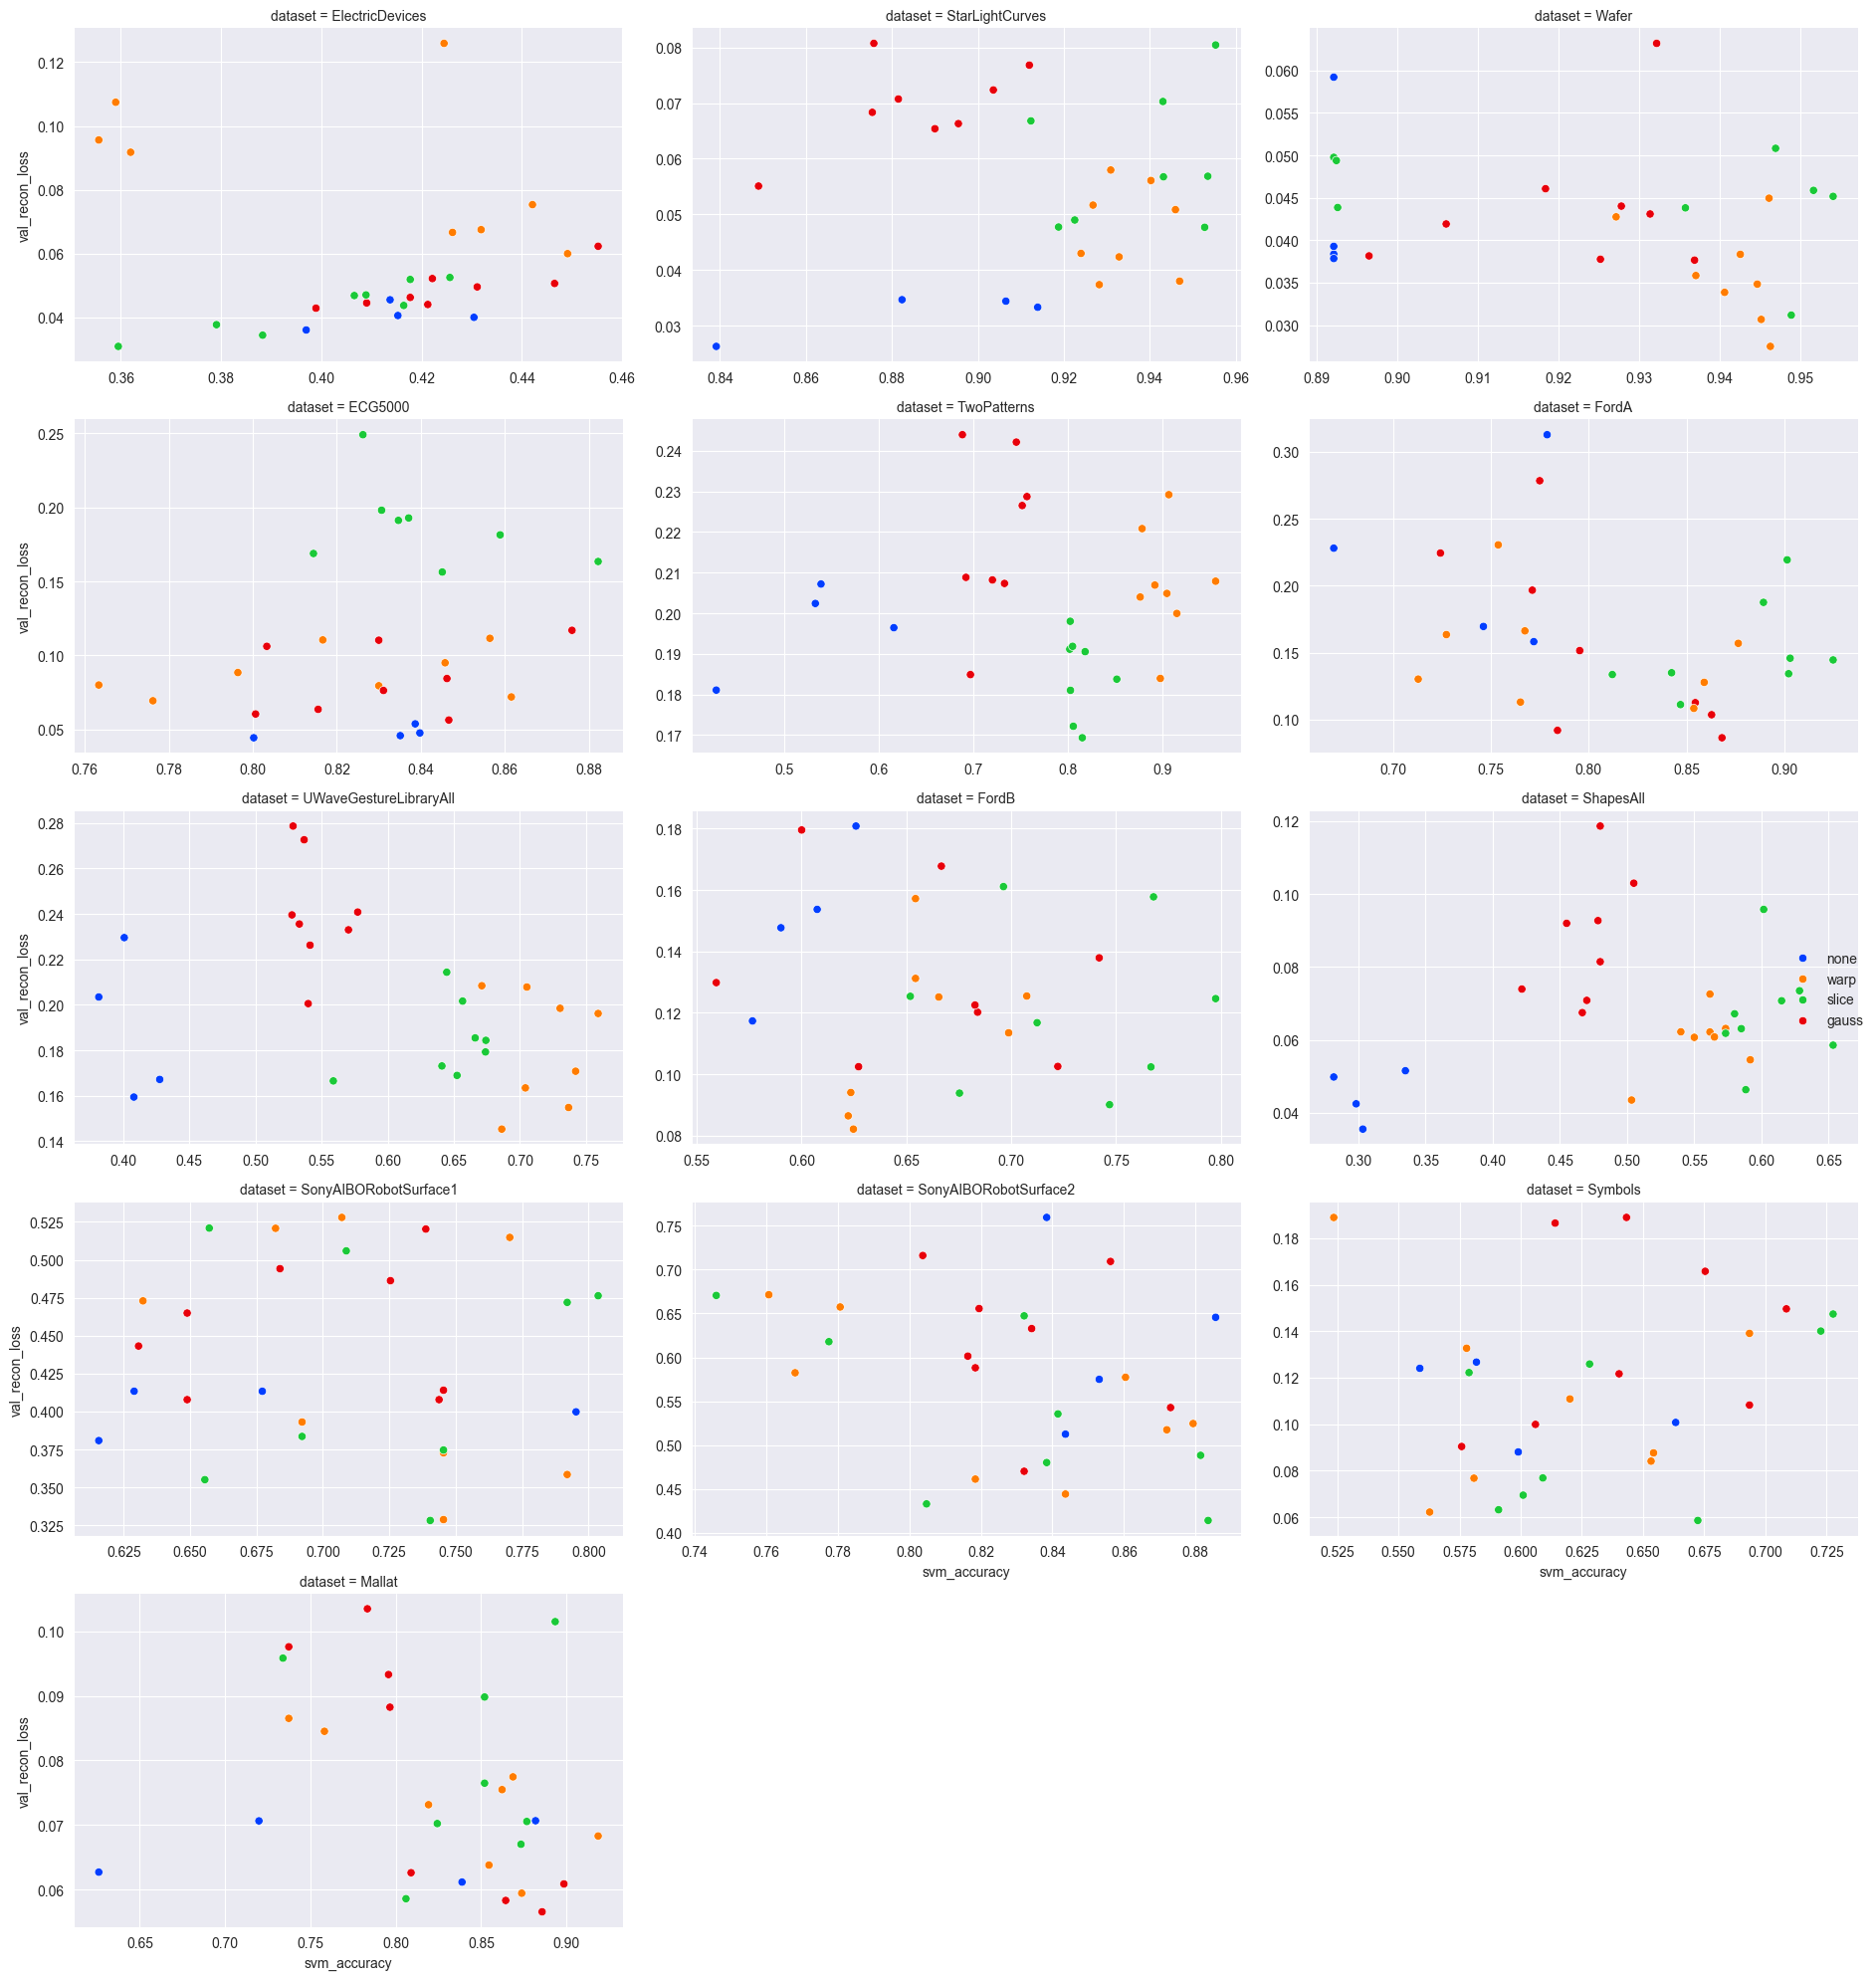

In [193]:
scatter_df = total
# Create a FacetGrid for the subplots
g = sns.FacetGrid(scatter_df, col="dataset", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the scatter plot to each subplot
g.map(sns.scatterplot, "svm_accuracy", "val_recon_loss", "Aug", palette="bright")

# Add legends to each subplot
g.add_legend()

# Adjust the layout for better visualization
g.fig.tight_layout()

# Display the plot
plt.show()

## IS VS SVM across datasets, colored by augmentations

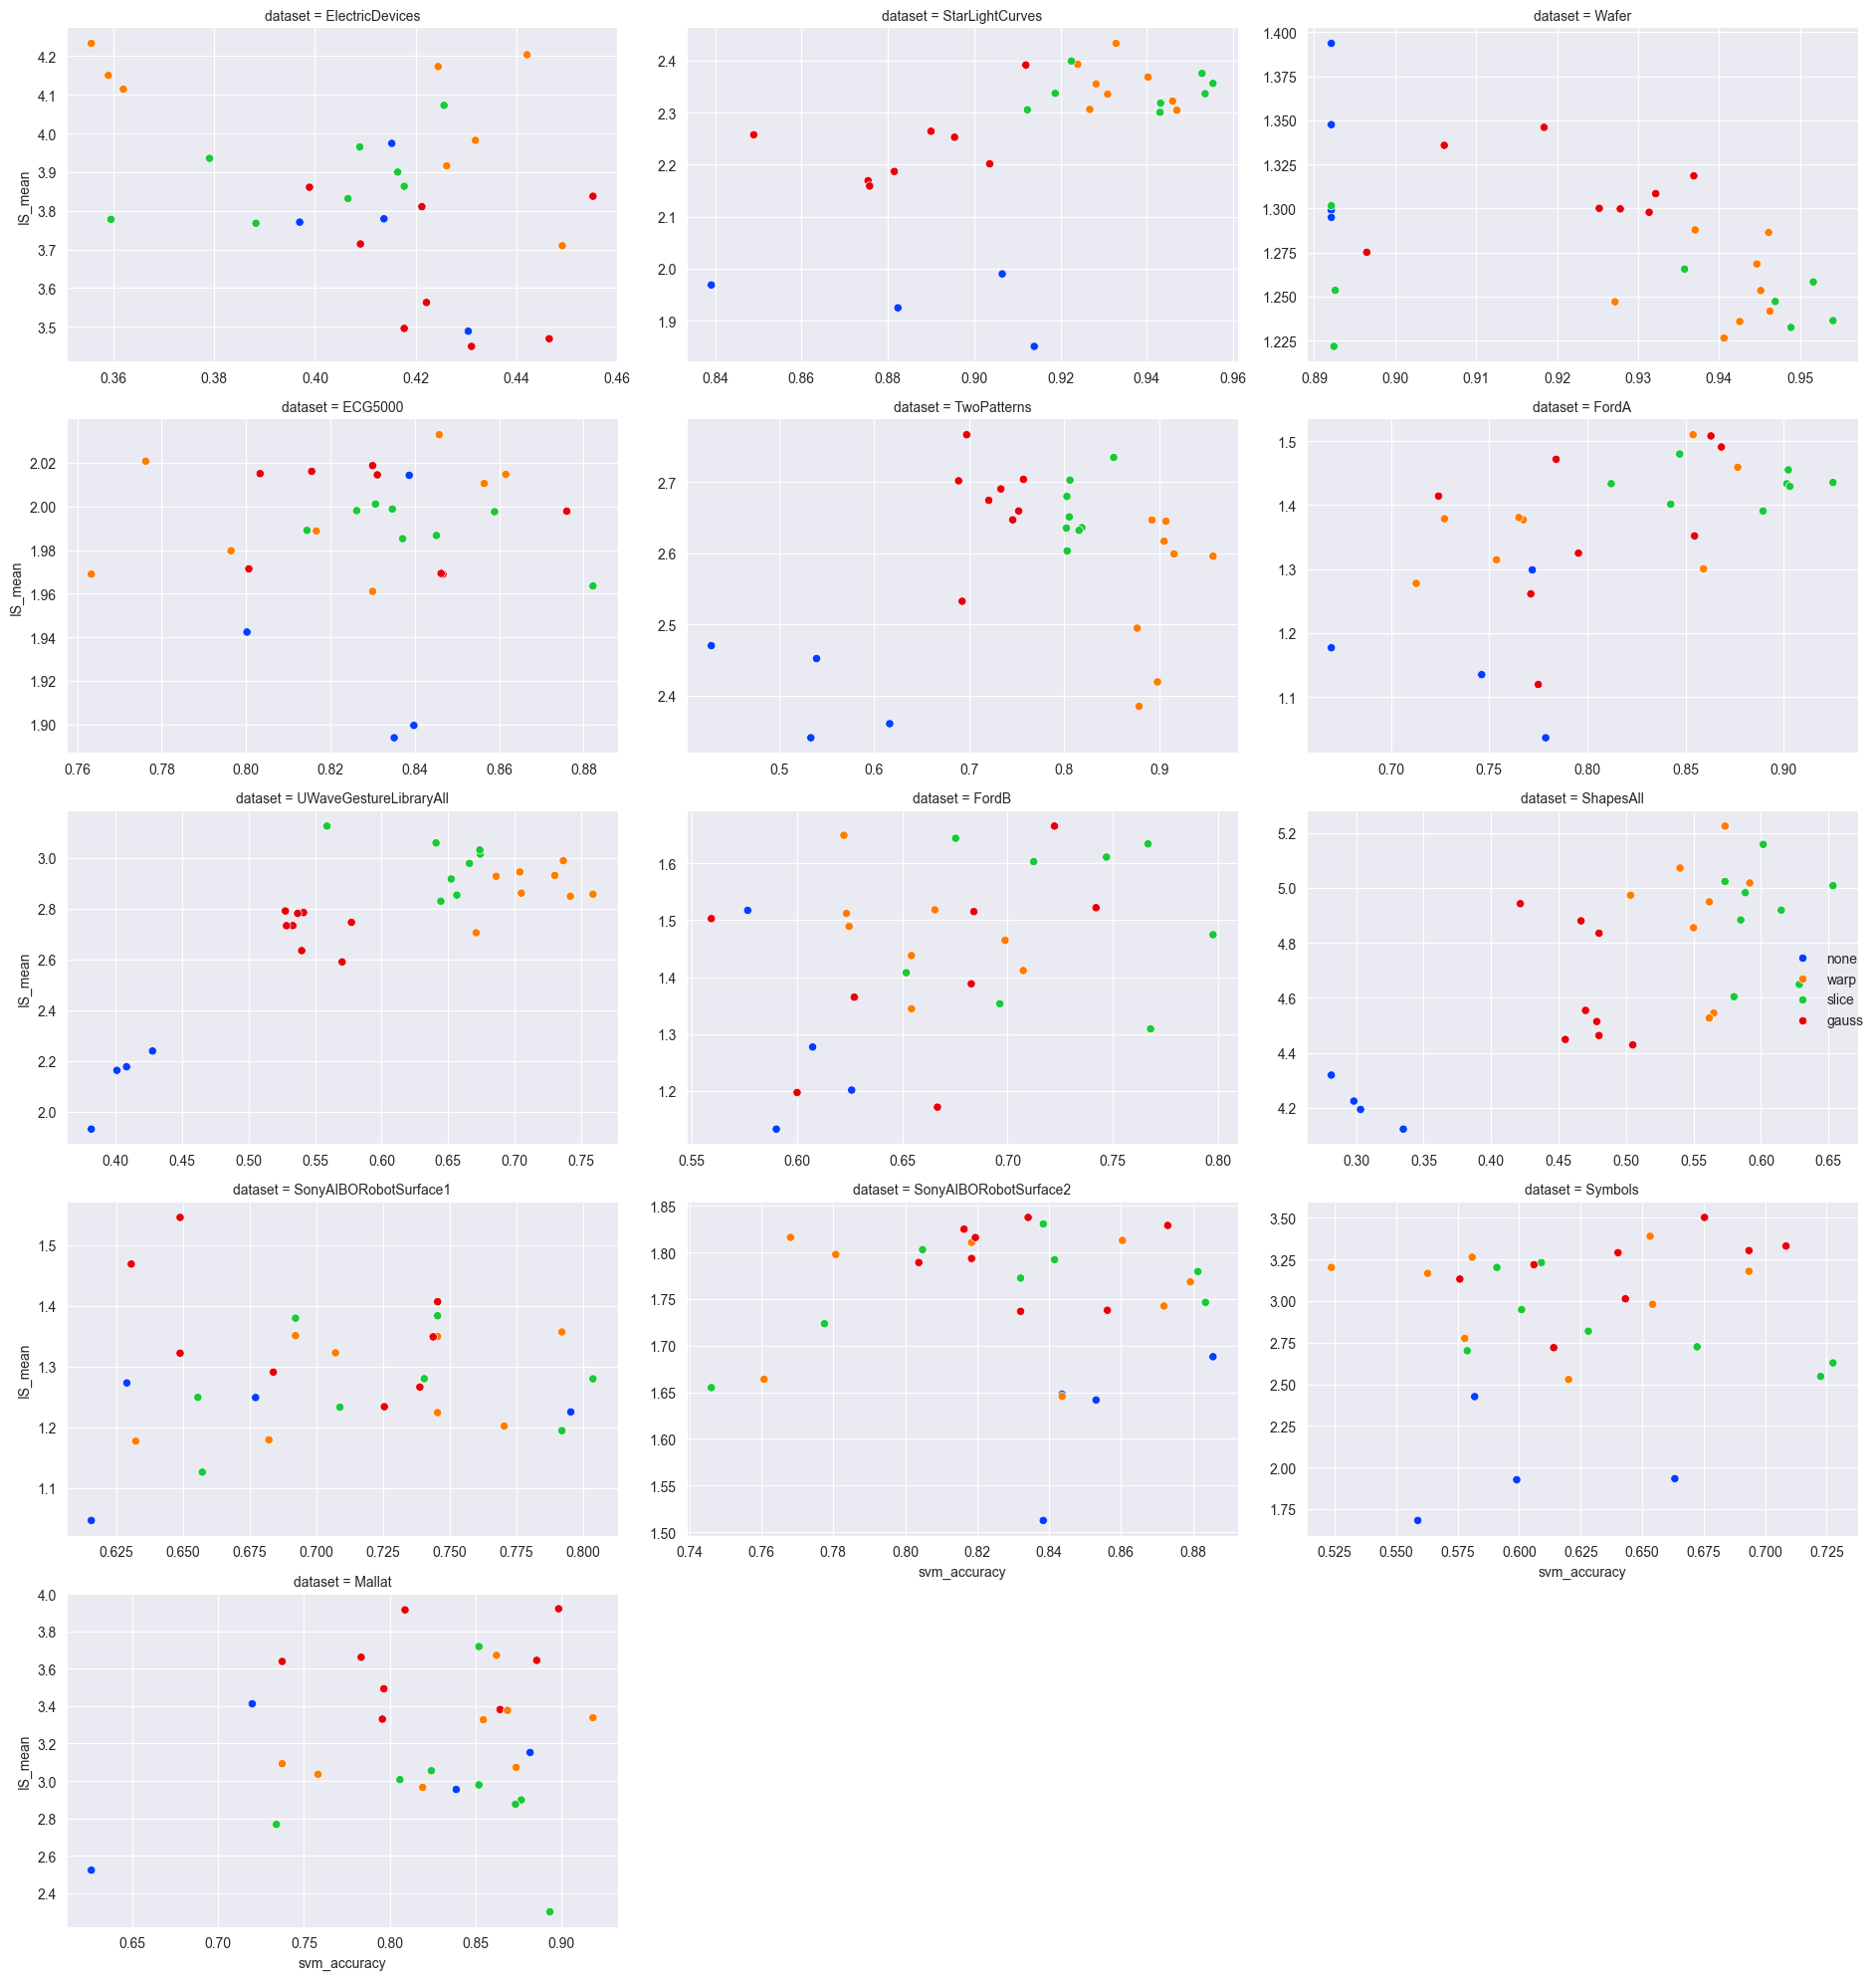

In [194]:
scatter_df = total
# Create a FacetGrid for the subplots
g = sns.FacetGrid(scatter_df, col="dataset", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the scatter plot to each subplot
g.map(sns.scatterplot, "svm_accuracy", "IS_mean", "Aug", palette="bright")

# Add legends to each subplot
g.add_legend()

# Adjust the layout for better visualization
g.fig.tight_layout()

# Display the plot
plt.show()

## SVM vs CAS, colored by augs

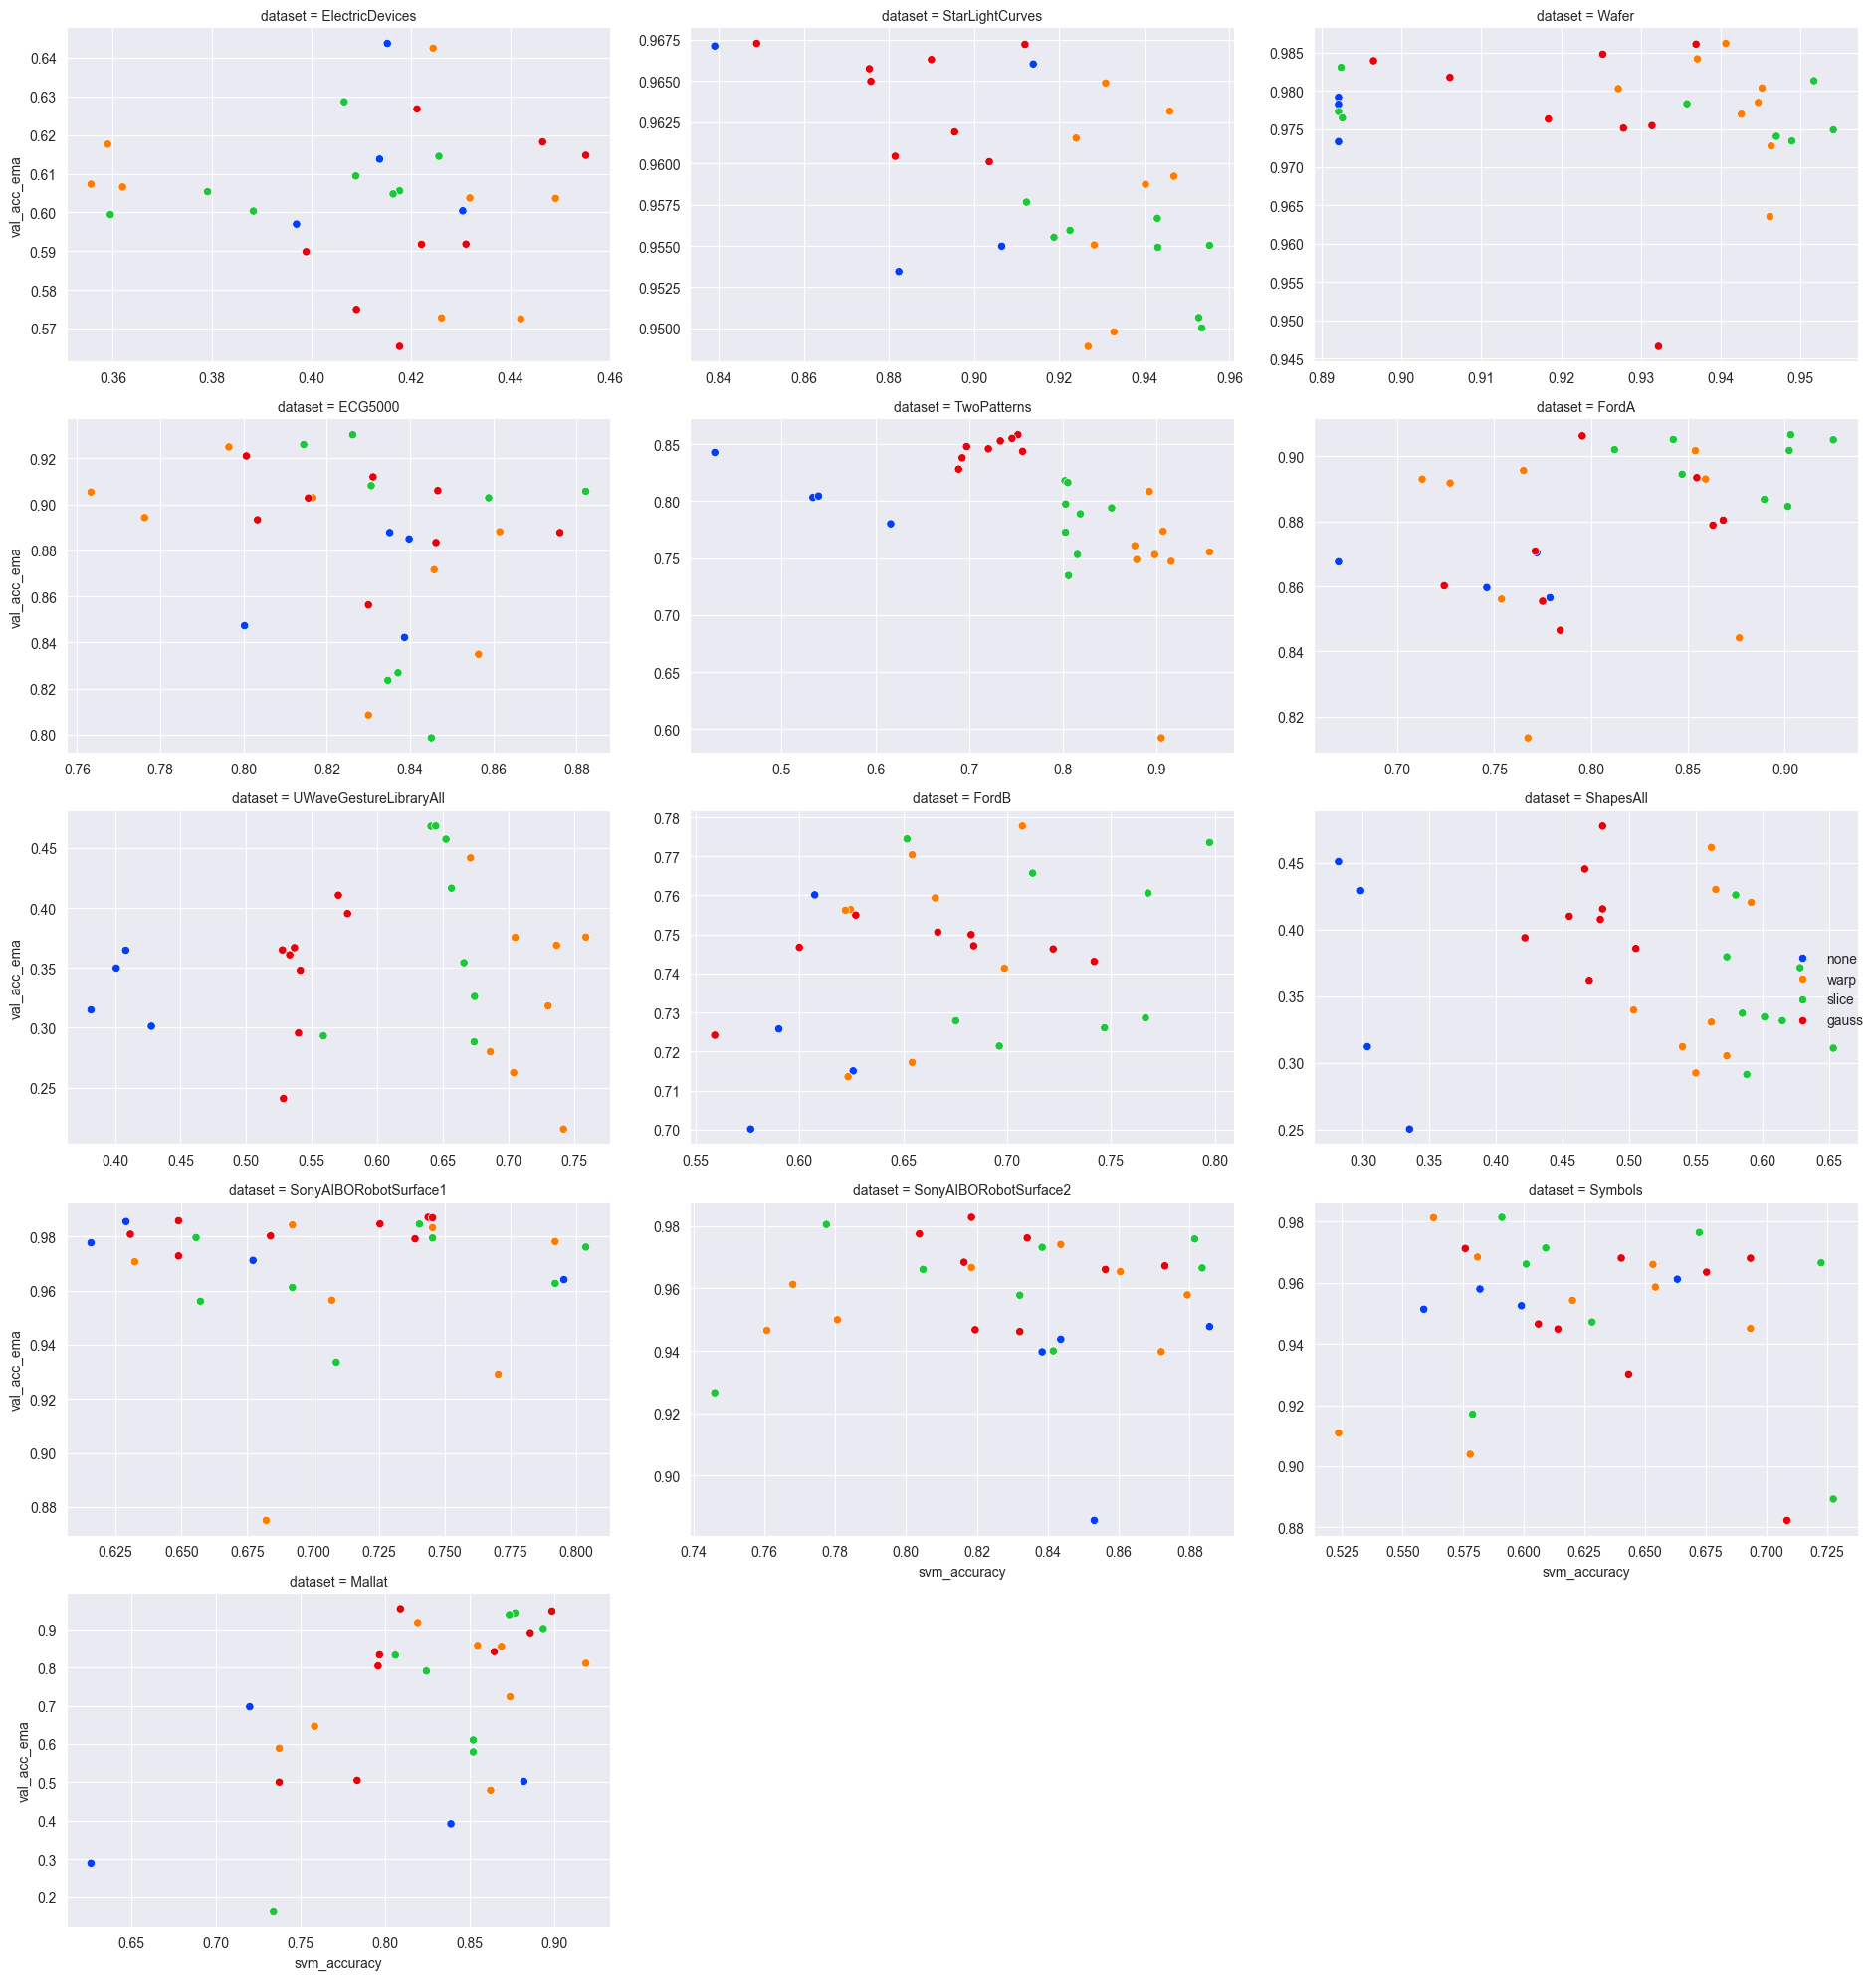

In [195]:
scatter_df = total
# Create a FacetGrid for the subplots
g = sns.FacetGrid(scatter_df, col="dataset", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the scatter plot to each subplot
g.map(sns.scatterplot, "svm_accuracy", "val_acc_ema", "Aug", palette="bright")

# Add legends to each subplot
g.add_legend()

# Adjust the layout for better visualization
g.fig.tight_layout()

# Display the plot
plt.show()

# Correlations

In [123]:


metrics = ["svm_accuracy_mean", "knn_accuracy_mean", "val_recon_loss_mean", "IS_mean_mean", "FID_mean", "val_acc_ema_mean" ]
augs = ["gauss", "slice", "warp"]
ssl_methods = ["barlowtwins", "vibcreg"]


In [175]:
test =total[total["dataset"] == "Wafer"]
test[test["SSL_method"] == "regular"]

svm_accuracy  knn_accuracy  val_recon_loss       FID   IS_mean  \
0      0.892116      0.933160        0.038369  5.272320  1.299081   
1      0.892116      0.937054        0.039280  6.490416  1.347603   
2      0.892116      0.927158        0.037850  5.510309  1.294974   
3      0.892116      0.936405        0.059207  5.624189  1.393727   

   val_acc_ema    run_id dataset SSL_method   Aug  
0     0.973414  pnvojtrv   Wafer    regular  none  
1     0.979136  q05excqj   Wafer    regular  none  
2     0.973319  627wouu4   Wafer    regular  none  
3     0.978219  2rzqcuqn   Wafer    regular  none

In [181]:
def plot_corr(df, aug = "", ssl_method = "", dataset = "", metrics = ["svm_accuracy", "knn_accuracy", "val_recon_loss", "IS_mean", "FID", "val_acc_ema"]):
    augs = ["gauss", "slice", "warp"]
    ssl_methods = ["barlowtwins", "vibcreg", "regular"]
    if dataset != "":
        df = df[df["dataset"] == dataset]
    else:
        dataset = "All"
    if ssl_method != "":
        df = df[df["SSL_method"] == ssl_method]
    else:
        ssl_method = "All"
    if aug != "":
        df = df[df["Aug"] == aug]
    else:
        aug = "All"
    df = df[metrics]

    nr_rows = df.shape[0] 
    correlation_matrix = df.corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f"Dataset: {dataset}, SSL method: {ssl_method}, augmentation: {aug}, nr of samples: {nr_rows}")
    plt.show()



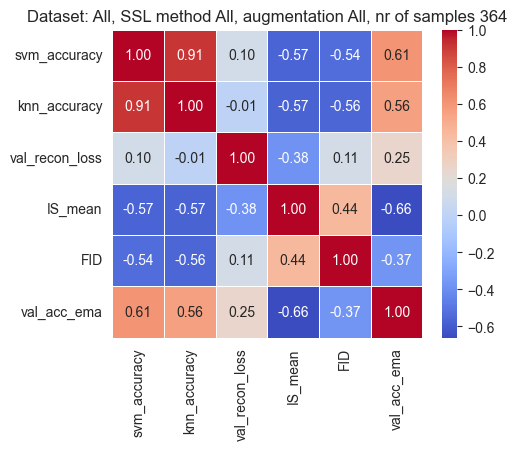

In [179]:
plot_corr(df = total)

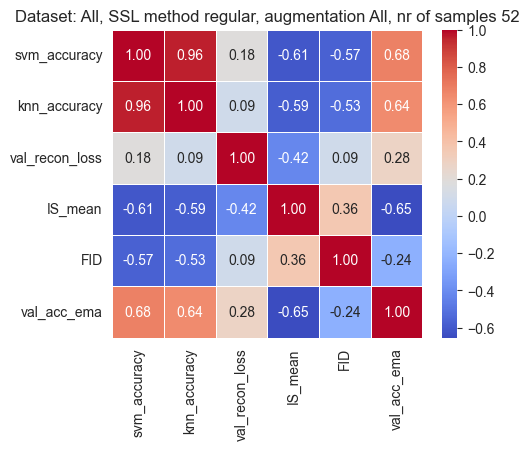

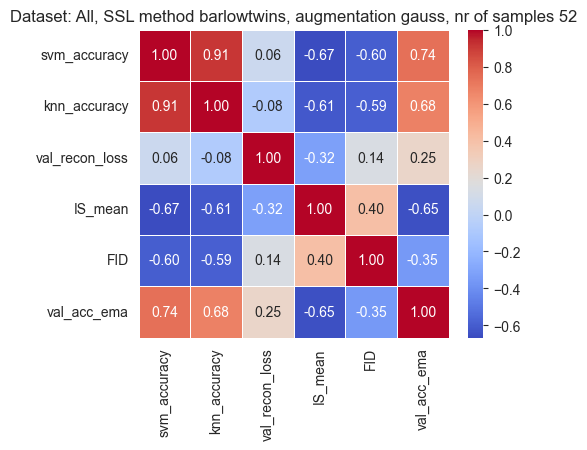

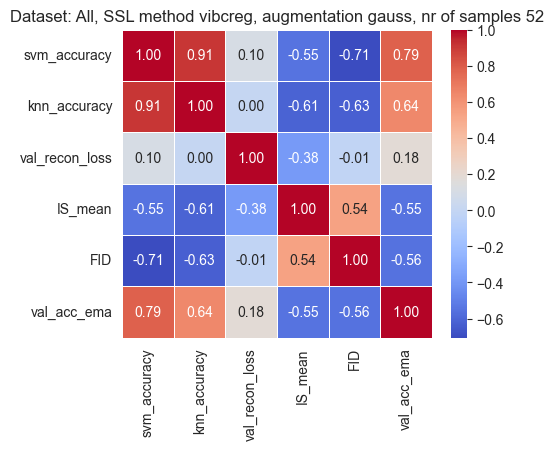

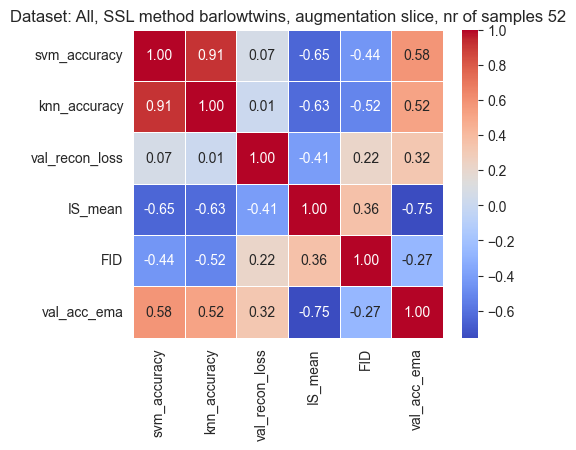

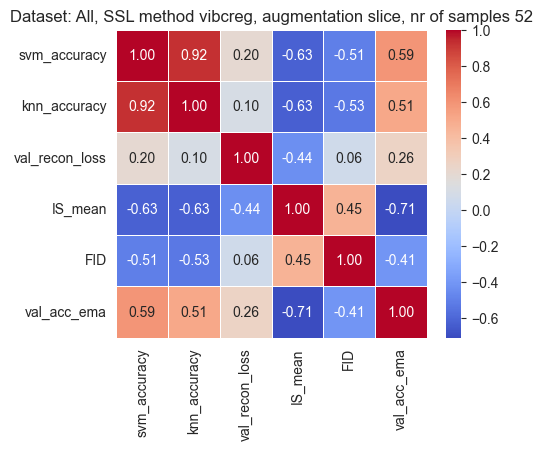

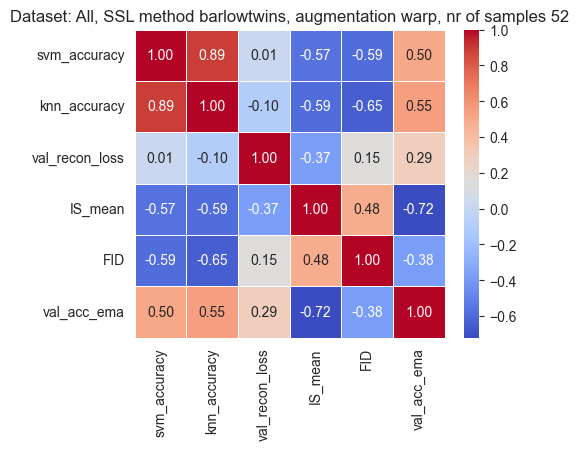

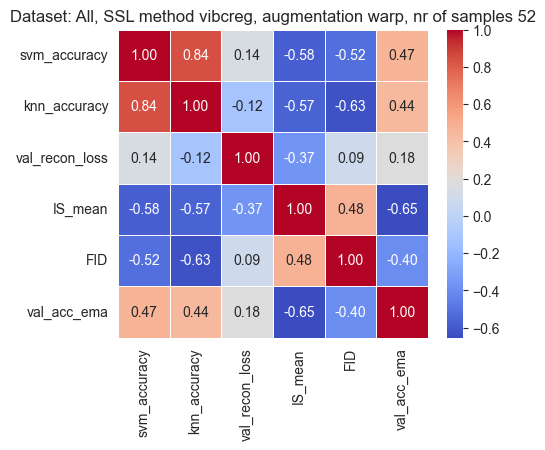

In [180]:
plot_corr(df = total, ssl_method = "regular", dataset = "")
for aug in augs:
    for ssl_method in ssl_methods:
        plot_corr(df = total, aug= aug, ssl_method=ssl_method)


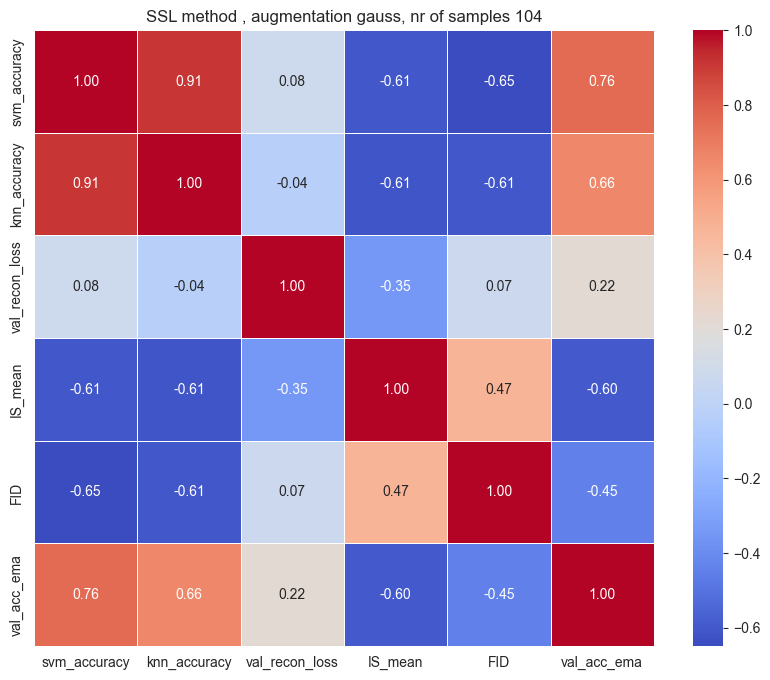

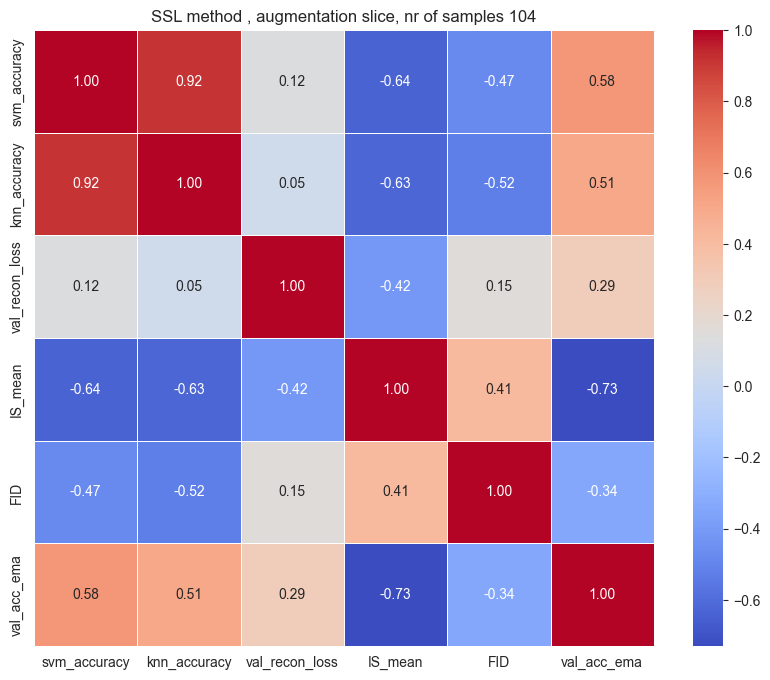

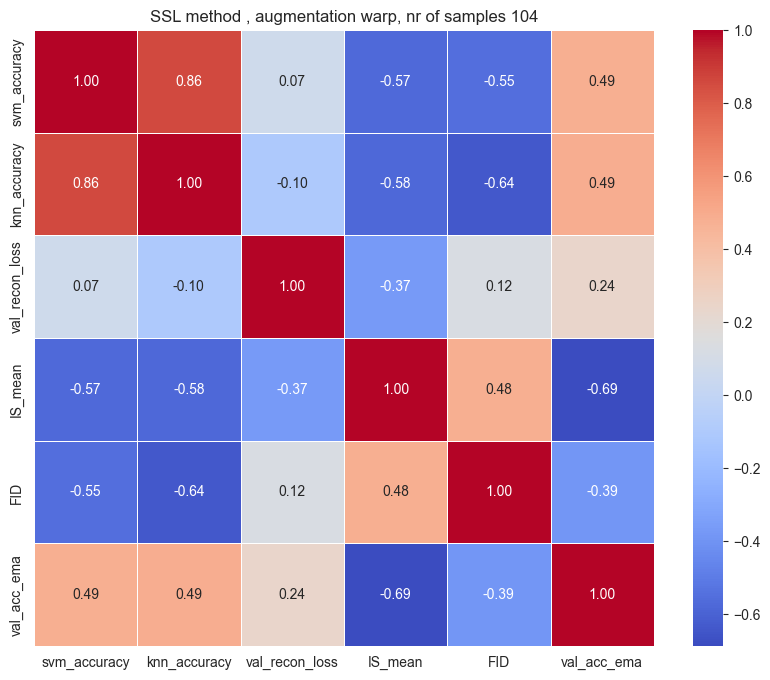

In [161]:
# for aug in augs:
#     for ssl_method in ssl_methods:
#         plot_corr(df = total_mean, aug= aug, ssl_method=ssl_method)

for aug in augs:
    plot_corr(df = total, aug= aug, dataset = "")

In [100]:
total_mean

dataset  svm_accuracy_mean  knn_accuracy_mean  \
0                  ECG5000               0.84               0.86   
1          ElectricDevices               0.42               0.40   
2                    FordA               0.83               0.80   
3                    FordB               0.68               0.64   
4                   Mallat               0.78               0.68   
..                     ...                ...                ...   
86         StarLightCurves               0.94               0.92   
87                 Symbols               0.61               0.45   
88             TwoPatterns               0.90               0.64   
89  UWaveGestureLibraryAll               0.73               0.62   
90                   Wafer               0.94               0.97   

    val_recon_loss_mean  IS_mean_mean  FID_mean  val_acc_ema_mean  \
0              0.104447          2.00      2.47             0.880   
1              0.048868          3.75     11.54             0.599   
2              0.108488          1.45      2.28             0.878   
3              0.123186          1.52      2.88             0.741   
4              0.095675          3.53      2.12             0.661   
..                  ...           ...       ...               ...   
86             0.051968          2.35      1.07             0.962   
87             0.077689          3.20      8.84             0.969   
88             0.213724          2.56      4.05             0.715   
89             0.189319          2.91      6.80             0.360   
90             0.035231          1.26      3.67             0.979   

     SSL_method    Aug  
0   barlowtwins  gauss  
1   barlowtwins  gauss  
2   barlowtwins  gauss  
3   barlowtwins  gauss  
4   barlowtwins  gauss  
..          ...    ...  
86      vibcreg   warp  
87      vibcreg   warp  
88      vibcreg   warp  
89      vibcreg   warp  
90      vibcreg   warp  

[91 rows x 9 columns]

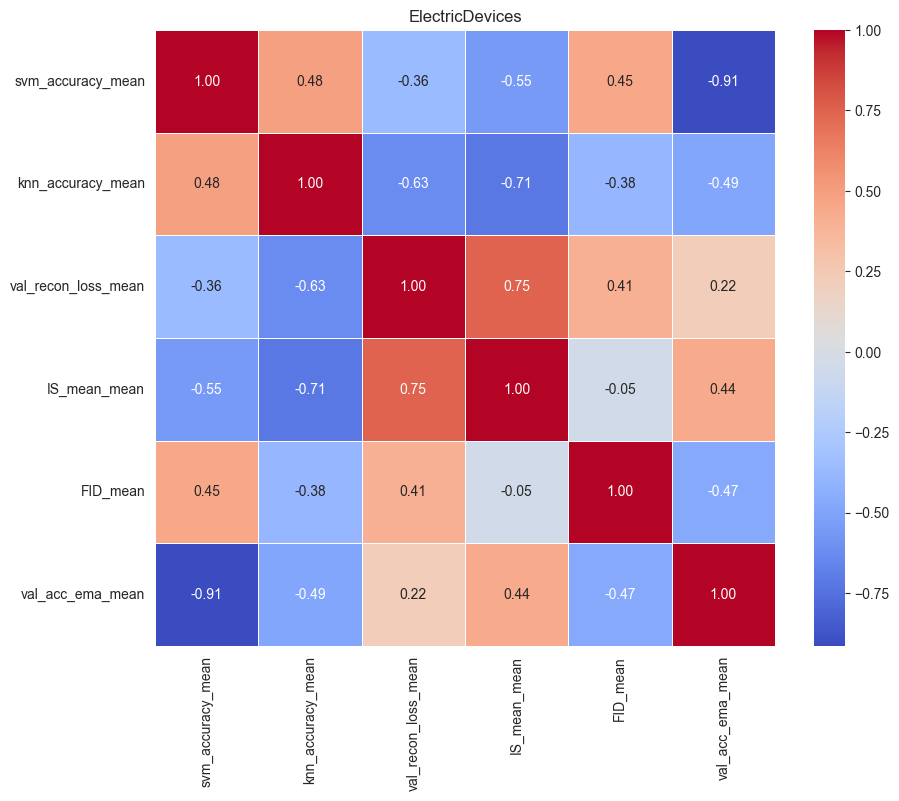

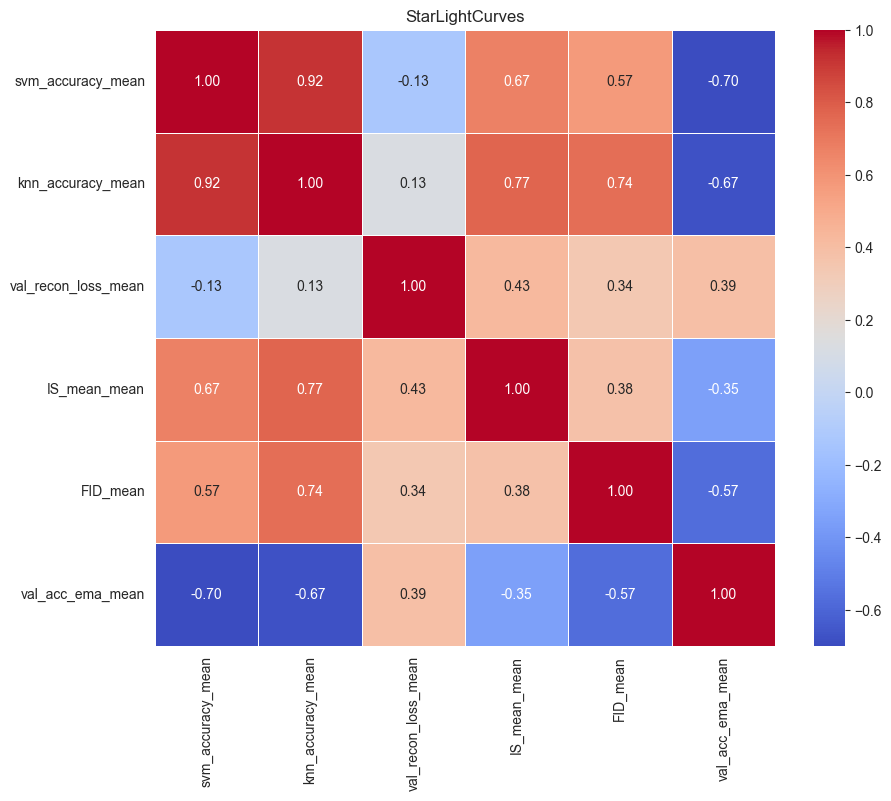

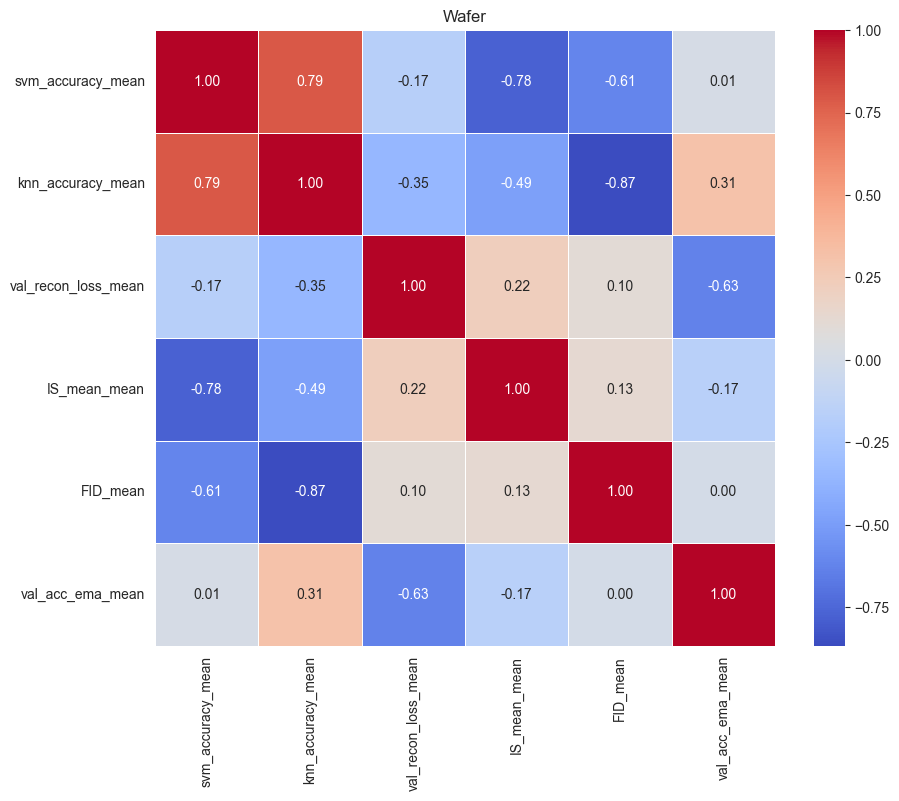

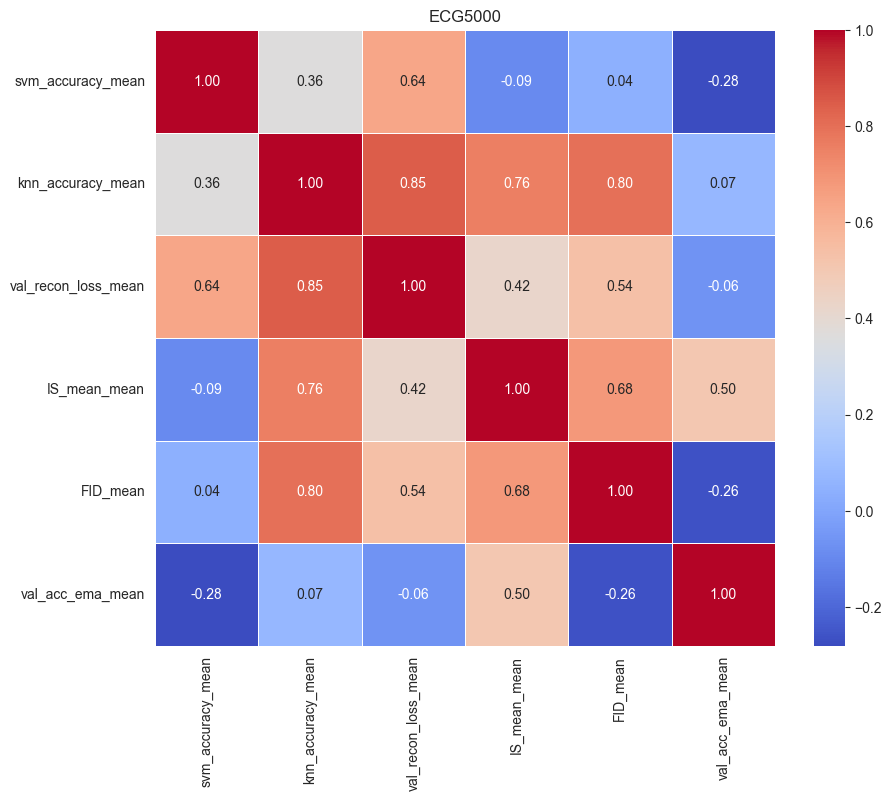

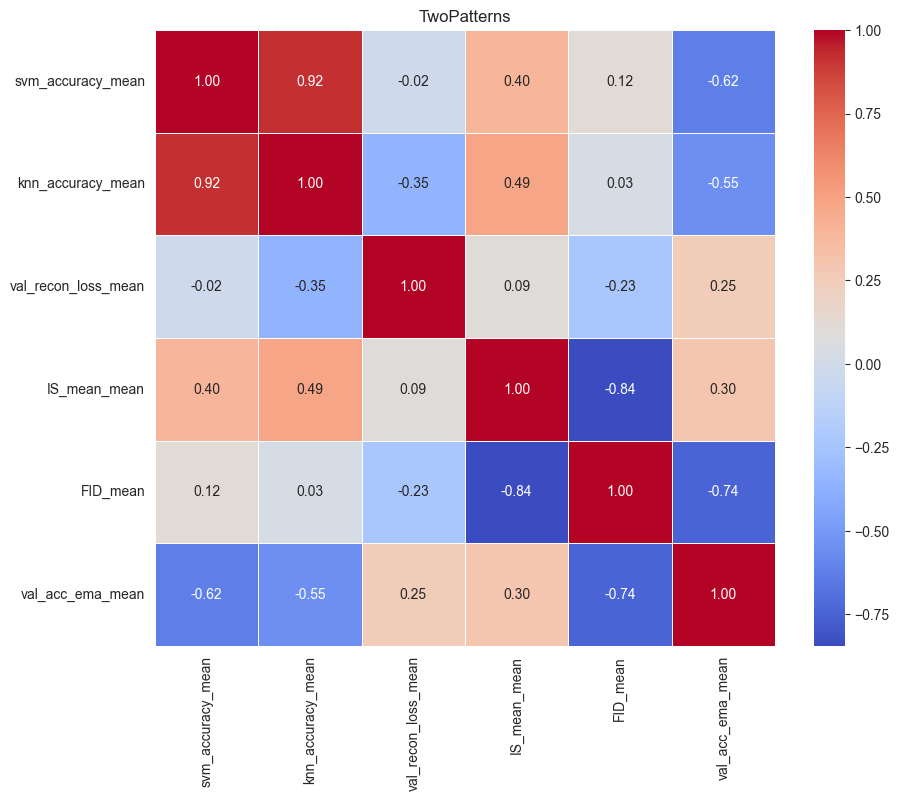

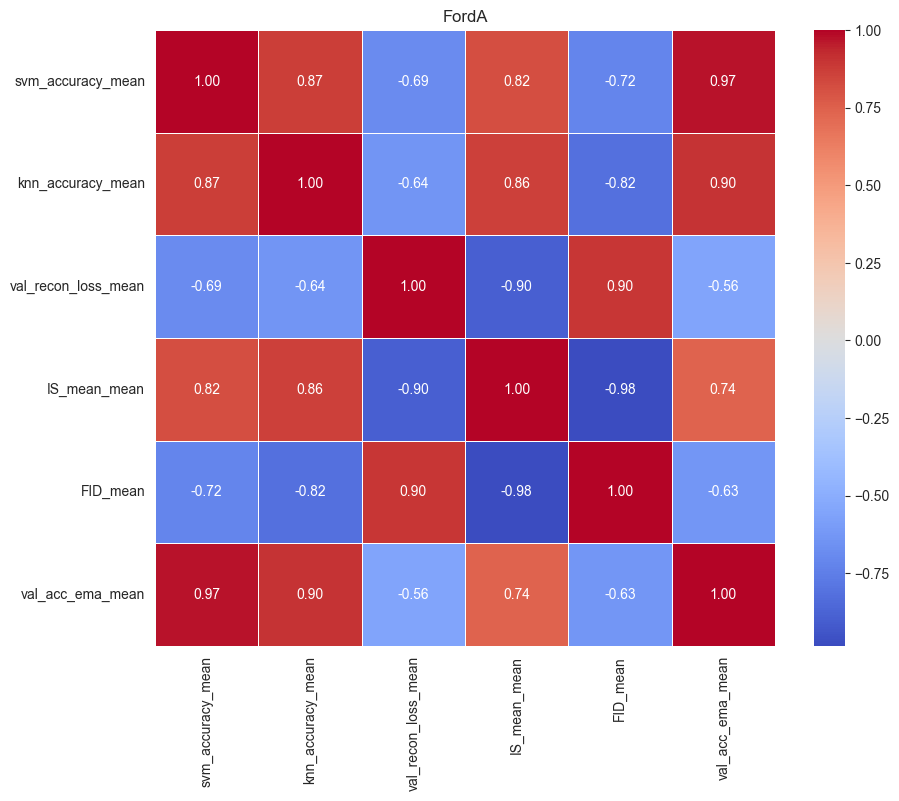

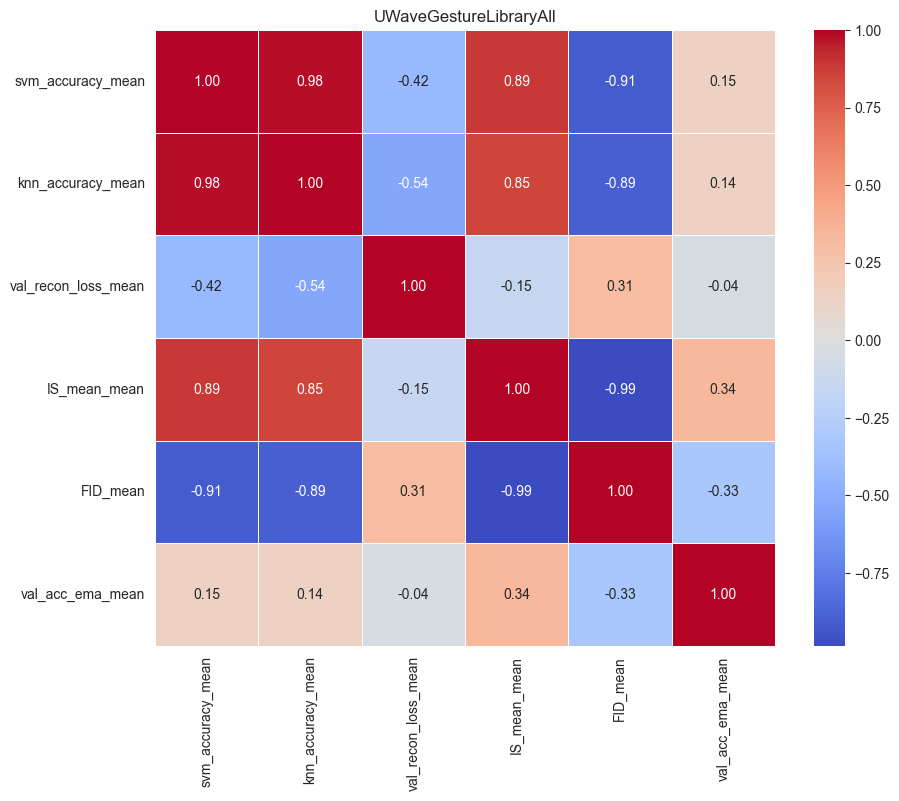

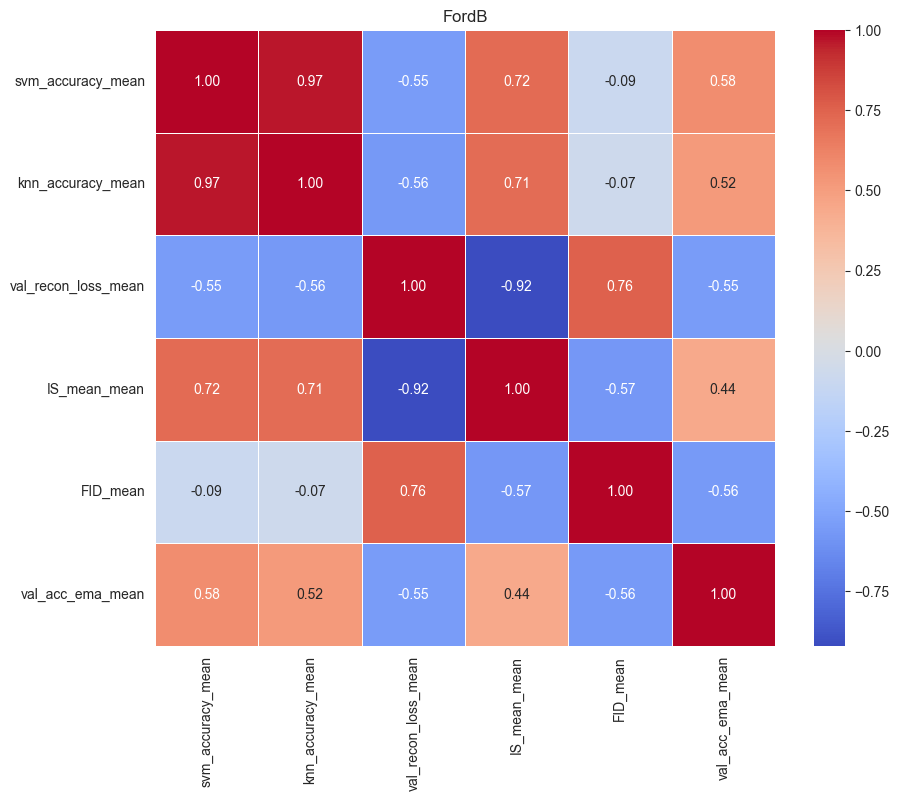

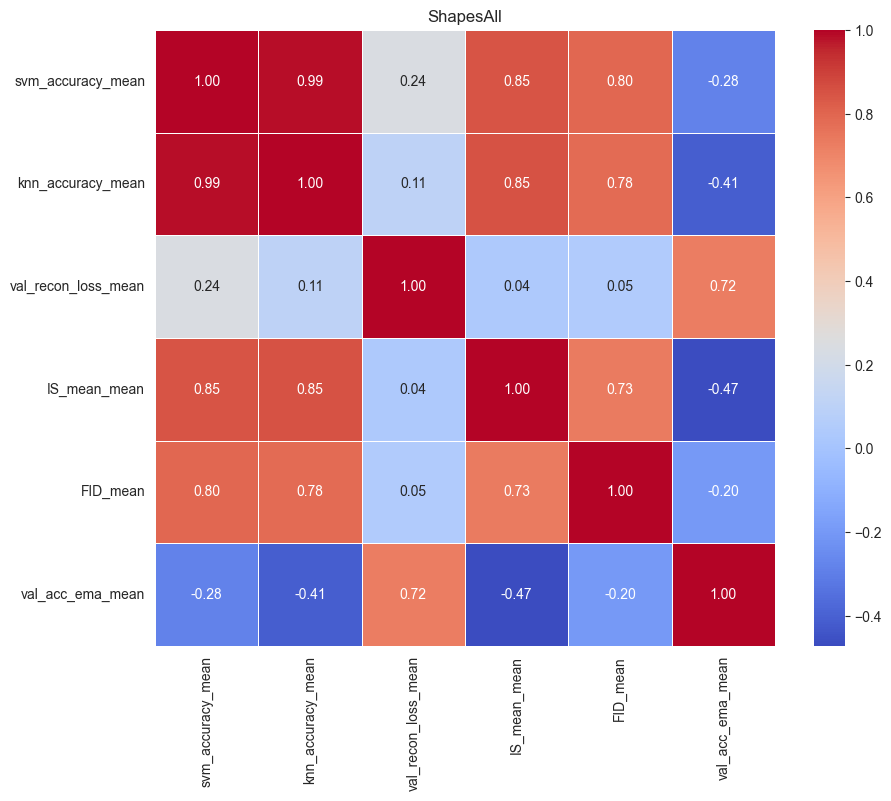

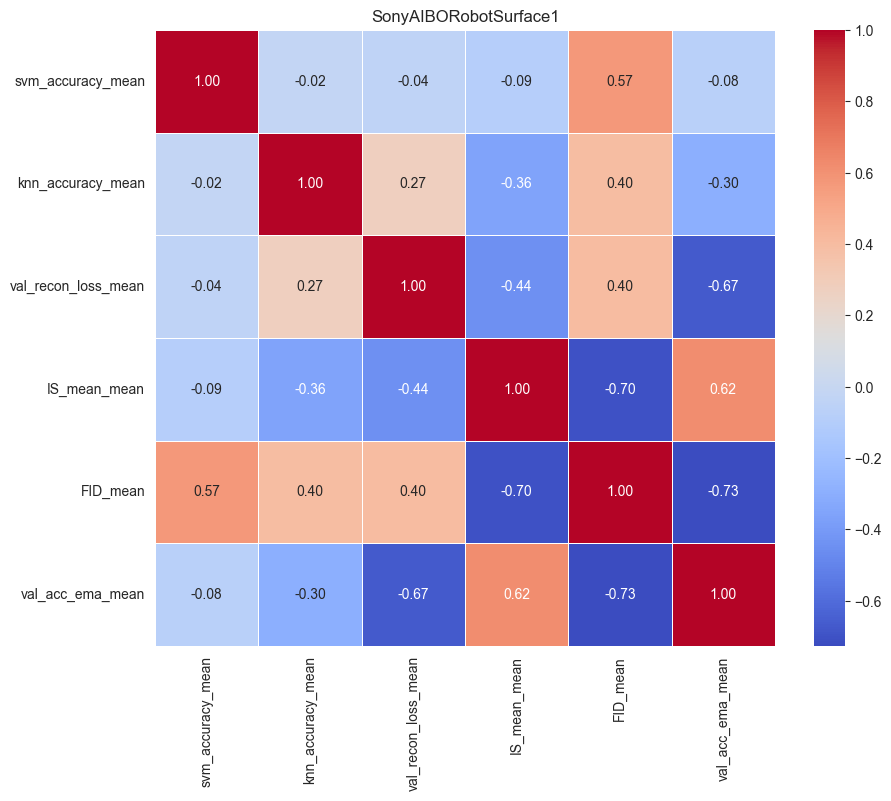

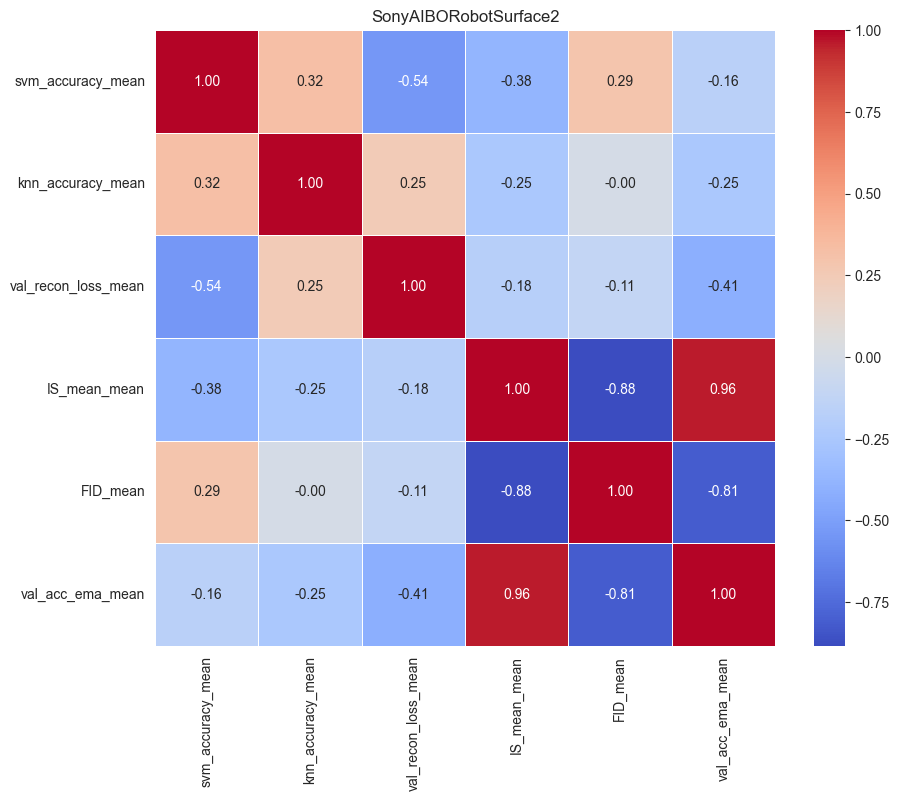

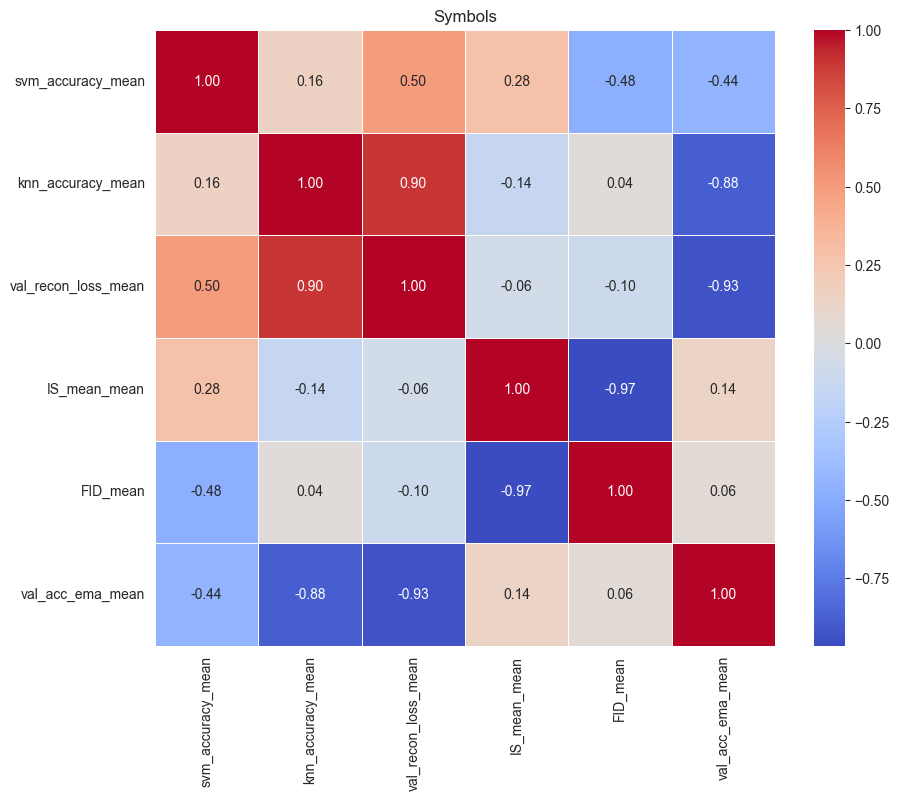

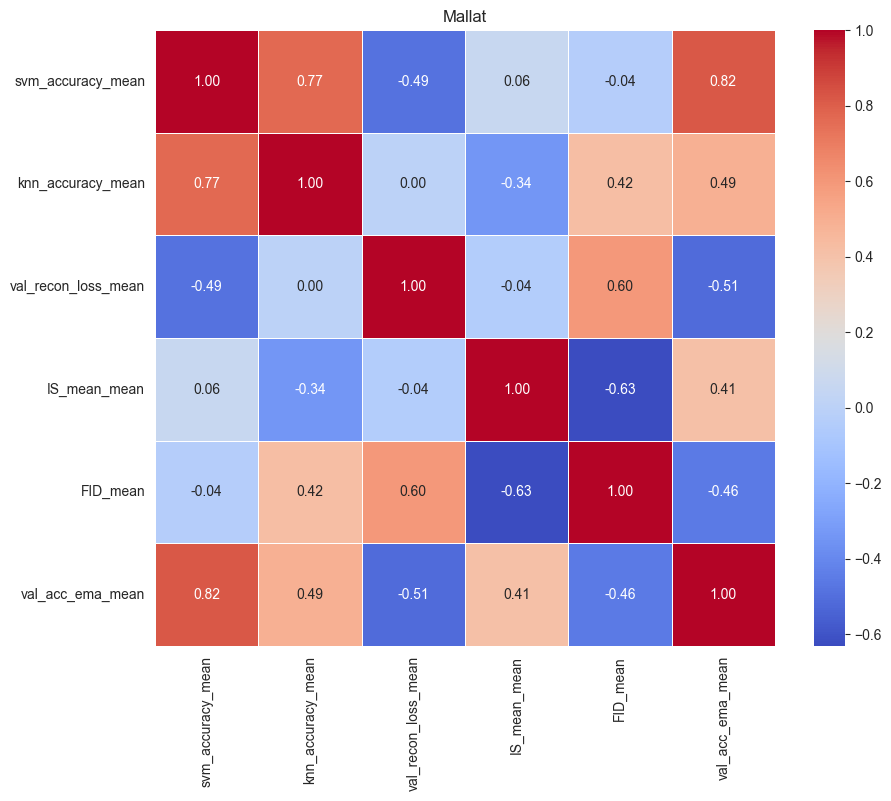

In [97]:


for dataset in datasets:
    df = total_mean[total_mean["dataset"] == dataset]
    df = df[df]
    df = df[metrics]

    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Display the correlation matrix
    # print(correlation_matrix)

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(dataset)
    plt.show()

In [150]:
# # methods = ["regular", "byol", "barlowtwins", "vibcreg"]  # Replace with your actual methods

# f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
# for dataset in datasets:
#     data_svm = all_summaries_stage1[(all_summaries_stage1["dataset"] == dataset) & (all_summaries_stage1["method"].isin(methods))]
#     data_knn = all_summaries_stage1[(all_summaries_stage1["dataset"] == dataset) & (all_summaries_stage1["method"].isin(methods))]
    
#     min_svm, max_svm = data_svm['svm_accuracy'].min(), data_svm['svm_accuracy'].max()
#     min_knn, max_knn = data_knn['knn_accuracy'].min(), data_knn['knn_accuracy'].max()

#     sns.boxplot(x="method", y="svm_accuracy", data=data_svm, ax=a[datasets.index(dataset)][0])
#     a[datasets.index(dataset)][0].set_title(f"SVM Accuracy for {dataset} - Stage 1")
#     a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][0].set_ylim(min_svm - 0.1, max_svm + 0.1)  # Adjust y-axis limits

#     sns.boxplot(x="method", y="knn_accuracy", data=data_knn, ax=a[datasets.index(dataset)][1])
#     a[datasets.index(dataset)][1].set_title(f"KNN Accuracy for {dataset} - Stage 1")
#     a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][1].set_ylim(min_knn - 0.1, max_knn + 0.1)  # Adjust y-axis limits

# plt.subplots_adjust(hspace = 2)  # Add more vertical spacing between subplots
# plt.savefig('results/boxplot.png', dpi = 300)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="svm_accuracy", data=all_summaries_stage1[all_summaries_stage1["method"].isin(methods)])
# plt.title("SVM Accuracy for All Datasets")
# plt.xticks(rotation=90)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="knn_accuracy", data=all_summaries_stage1[all_summaries_stage1["method"].isin(methods)])
# plt.title("KNN Accuracy for All Datasets")
# plt.xticks(rotation=90)
# plt.show()

/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_73991/1871951217.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_73991/1871951217.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_73991/1871951217.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), ro

KeyboardInterrupt: 

In [ ]:
# f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
# for dataset in datasets:
#     data_svm = all_summaries_stage1[all_summaries_stage1["dataset"] == dataset]
#     data_knn = all_summaries_stage1[all_summaries_stage1["dataset"] == dataset]
#     min_svm, max_svm = data_svm['svm_accuracy'].min(), data_svm['svm_accuracy'].max()
#     min_knn, max_knn = data_knn['knn_accuracy'].min(), data_knn['knn_accuracy'].max()

#     sns.boxplot(x="method", y="svm_accuracy", data=all_summaries_stage1[all_summaries_stage1["dataset"] == dataset], ax=a[datasets.index(dataset)][0])
#     a[datasets.index(dataset)][0].set_title(f"SVM Accuracy for {dataset} - Stage 1")
#     a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][0].set_ylim(min_svm - 0.1, max_svm + 0.1)  # Adjust y-axis limits

    
#     sns.boxplot(x="method", y="knn_accuracy", data=all_summaries_stage1[all_summaries_stage1["dataset"] == dataset], ax=a[datasets.index(dataset)][1])
#     a[datasets.index(dataset)][1].set_title(f"KNN Accuracy for {dataset} - Stage 1")
#     a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][1].set_ylim(min_knn - 0.1, max_knn + 0.1)  # Adjust y-axis limits

# plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
# plt.savefig('results/boxplot.png', dpi = 300)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="svm_accuracy", data=all_summaries_stage1)
# plt.title("SVM Accuracy for All Datasets")
# plt.xticks(rotation=90)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="knn_accuracy", data=all_summaries_stage1)
# plt.title("KNN Accuracy for All Datasets")
# plt.xticks(rotation=90)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="val_loss", data=all_summaries_stage1)
# plt.title("Validation Loss for All Datasets")
# plt.xticks(rotation=90)
# plt.show()

/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_55621/1225494271.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_55621/1225494271.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_55621/1225494271.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), ro

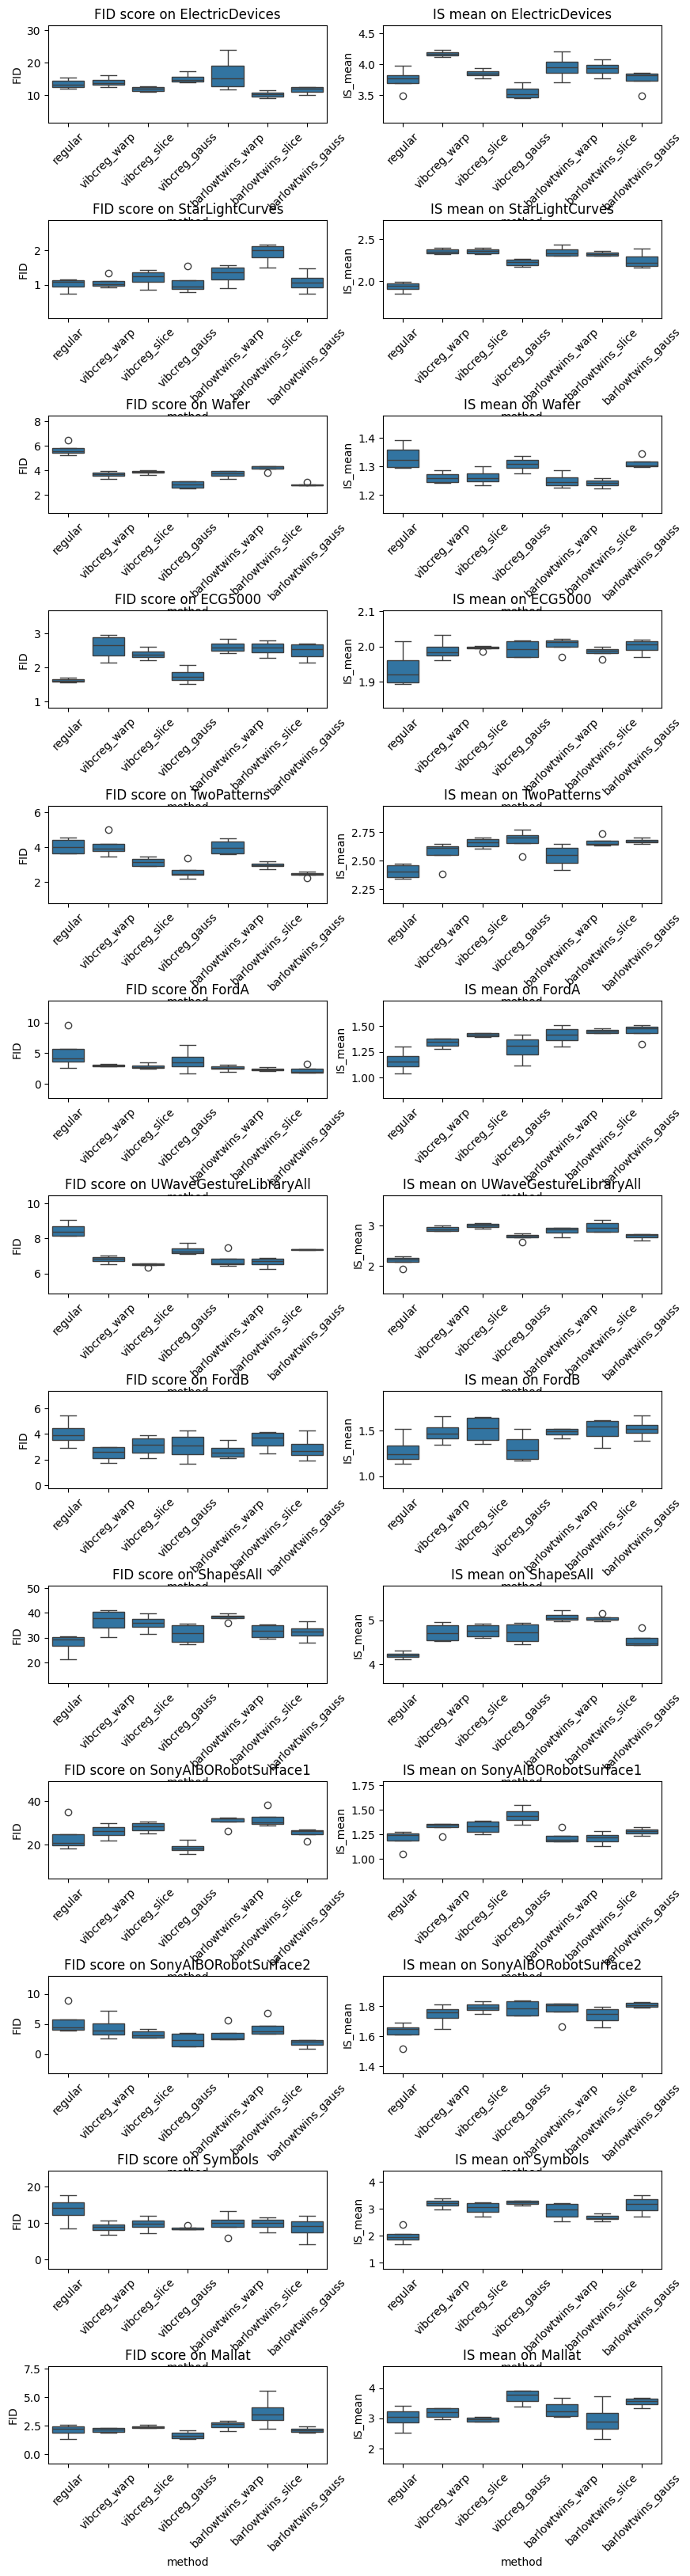

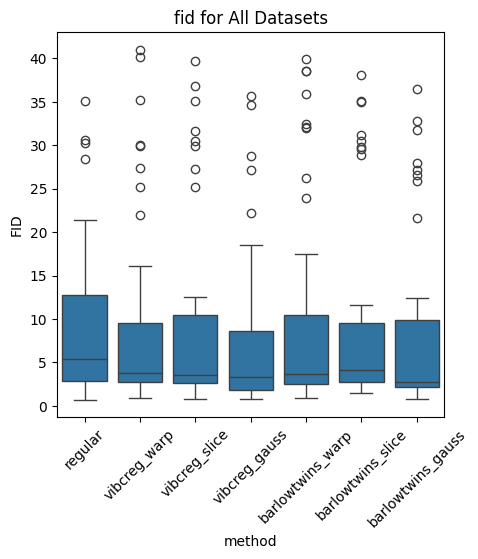

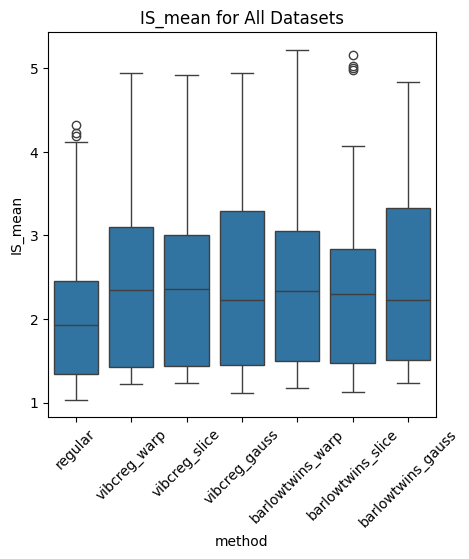

In [ ]:
# f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
# for dataset in datasets:
#     data_fid = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
#     data_is = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
    
#     min_fid, max_fid = data_fid['FID'].min(), data_fid['FID'].max()
#     min_is, max_is = data_is['IS_mean'].min(), data_is['IS_mean'].max()
    
#     sns.boxplot(x="method", y="FID", data=data_fid, ax=a[datasets.index(dataset)][0])
#     a[datasets.index(dataset)][0].set_title(f"FID score on {dataset}")
#     a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][0].set_ylim(min_fid - 0.5 * (max_fid - min_fid), max_fid + 0.5 * (max_fid - min_fid))  # Adjust y-axis limits

#     sns.boxplot(x="method", y="IS_mean", data=data_is, ax=a[datasets.index(dataset)][1])
#     a[datasets.index(dataset)][1].set_title(f"IS mean on {dataset}")
#     a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][1].set_ylim(min_is - 0.5 * (max_is - min_is), max_is + 0.5 * (max_is - min_is))  # Adjust y-axis limits

# plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
# plt.savefig('results/boxplot2.png', dpi = 300)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="FID", data=all_summaries_stage2)
# plt.title("fid for All Datasets")
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="IS_mean", data=all_summaries_stage2)
# plt.title("IS_mean for All Datasets")
# plt.xticks(rotation=45)
# plt.show()

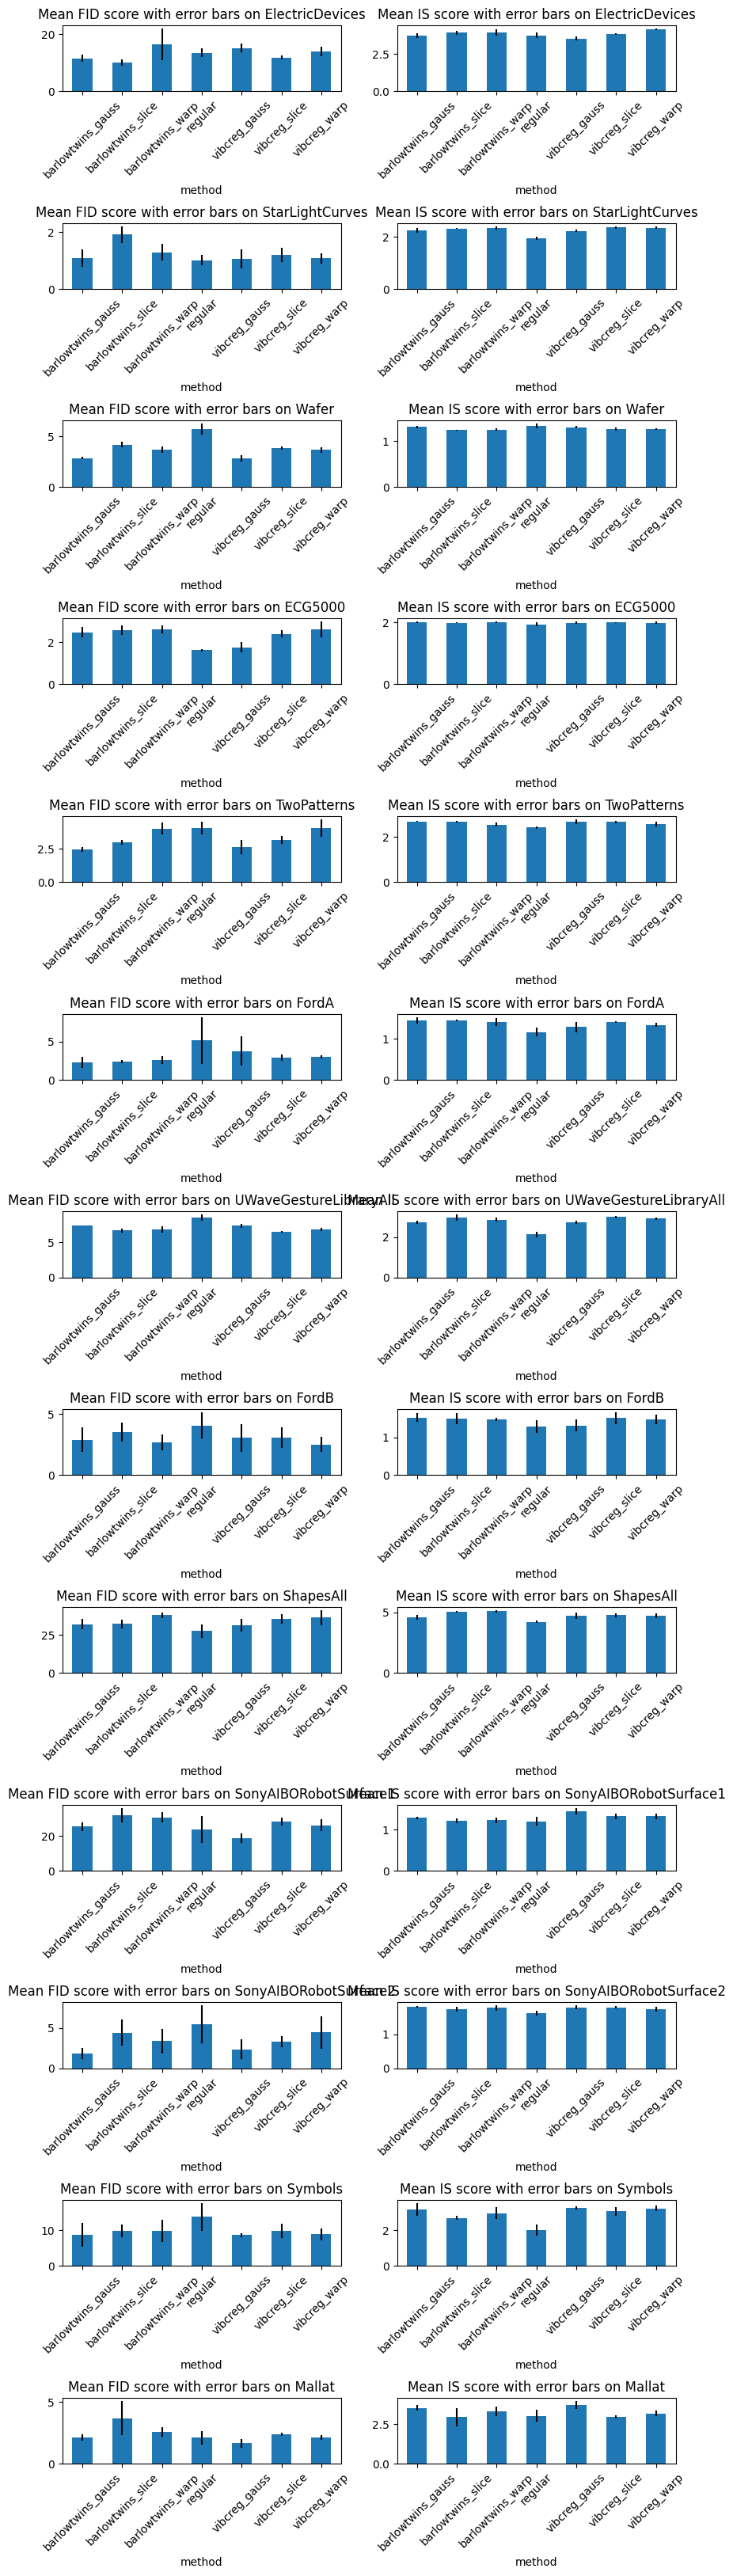

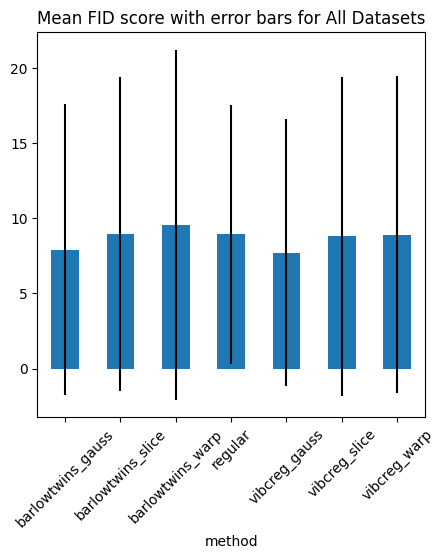

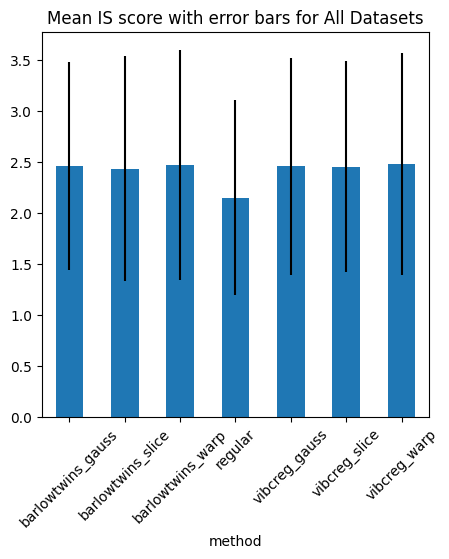

In [ ]:
# #Something is fucked
# f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
# for dataset in datasets:
#     data_fid = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
#     data_is = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
    
#     data_fid.groupby('method')['FID'].mean().plot(kind='bar', yerr=data_fid.groupby('method')['FID'].std(), ax=a[datasets.index(dataset)][0])
#     a[datasets.index(dataset)][0].set_title(f"Mean FID score with error bars on {dataset}")
#     a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels

#     data_is.groupby('method')['IS_mean'].mean().plot(kind='bar', yerr=data_is.groupby('method')['IS_mean'].std(), ax=a[datasets.index(dataset)][1])
#     a[datasets.index(dataset)][1].set_title(f"Mean IS score with error bars on {dataset}")
#     a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels

# plt.subplots_adjust(hspace = 2)  # Add more vertical spacing between subplots
# plt.show()

# plt.figure(figsize=(5, 5))
# all_summaries_stage2.groupby('method')['FID'].mean().plot(kind='bar', yerr=all_summaries_stage2.groupby('method')['FID'].std())
# plt.title("Mean FID score with error bars for All Datasets")
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(5, 5))
# all_summaries_stage2.groupby('method')['IS_mean'].mean().plot(kind='bar', yerr=all_summaries_stage2.groupby('method')['IS_mean'].std())
# plt.title("Mean IS score with error bars for All Datasets")
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# methods = ['regular', 'byol', 'barlowtwins', 'vibcreg']  # Replace with your actual methods

# f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
# for dataset in datasets:
#     data_fid = all_summaries_stage2[(all_summaries_stage2["dataset"] == dataset) & (all_summaries_stage2["method"].isin(methods))]
#     data_is = all_summaries_stage2[(all_summaries_stage2["dataset"] == dataset) & (all_summaries_stage2["method"].isin(methods))]
    
#     min_fid, max_fid = data_fid['FID'].min(), data_fid['FID'].max()
#     min_is, max_is = data_is['IS_mean'].min(), data_is['IS_mean'].max()
    
#     sns.boxplot(x="method", y="FID", data=data_fid, ax=a[datasets.index(dataset)][0])
#     a[datasets.index(dataset)][0].set_title(f"FID score on {dataset}")
#     a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][0].set_ylim(min_fid - 0.5 * (max_fid - min_fid), max_fid + 0.5 * (max_fid - min_fid))  # Adjust y-axis limits

#     sns.boxplot(x="method", y="IS_mean", data=data_is, ax=a[datasets.index(dataset)][1])
#     a[datasets.index(dataset)][1].set_title(f"IS mean on {dataset}")
#     a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
#     a[datasets.index(dataset)][1].set_ylim(min_is - 0.5 * (max_is - min_is), max_is + 0.5 * (max_is - min_is))  # Adjust y-axis limits

# plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
# plt.savefig('results/boxplot2.png', dpi = 300)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="FID", data=all_summaries_stage2[all_summaries_stage2["method"].isin(methods)])
# plt.title("fid for All Datasets")
# plt.xticks(rotation=45)
# plt.show()

# plt.figure(figsize=(5, 5))
# sns.boxplot(x="method", y="IS_mean", data=all_summaries_stage2[all_summaries_stage2["method"].isin(methods)])
# plt.title("IS_mean for All Datasets")
# plt.xticks(rotation=45)
# plt.show()